In [71]:
import matplotlib.pyplot as plt
import numpy as np
from random import random
import time
%matplotlib inline

In [72]:
# Define simulation parameters
xlim = 20
ylim = 20
num_robots = 3
dt = 0.01
p = 2  # Planar dimensions

array([[ 3.43,  5.91],
       [ 4.6 ,  2.88],
       [12.78, 15.42]])

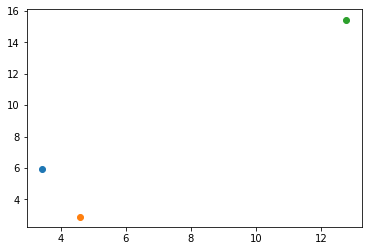

In [73]:
# Initialize pose for 3 robots
x = []  # System of robots with (X, Y, theta)

for _ in range(num_robots):
    X_start = round(xlim * random(), 2)
    Y_start = round(ylim * random(), 2)
    # theta_start = round(2 * np.pi * random() - np.pi, 2)
    x.append([X_start, Y_start])
    # plt.arrow(X_start, Y_start, np.cos(theta_start), np.sin(theta_start), width=0.1)
    plt.scatter(X_start, Y_start)
x = np.array(x) 
x

### Rendezvous error
![Rendezvous Error equation](img/rendezvous-error.png)
### Redezvous error gradient
![Rendezvous Error gradient](img/rendezvous-error-gradient.png)

In [74]:
def rendezvous_error(x):
    # Calculate the error
    err = 0
    for i in range(len(x)):
        for j in range(len(x)):
            if j == i:
                continue
            err += np.linalg.norm(x[i] - x[j])
    
    err /=2
    return err

[[11.7874      9.7761    ]
 [11.398574   17.964661  ]
 [ 4.16165974 18.67200761]]


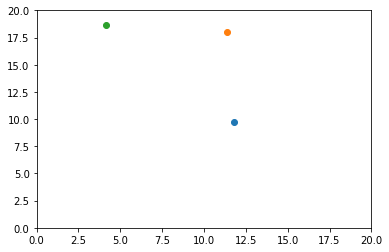

[[11.70725434  9.94694469]
 [11.32929166 17.8915573 ]
 [ 4.30879201 18.57695248]]


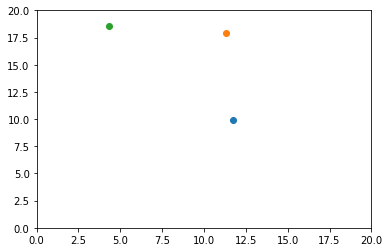

[[11.62949009 10.11269089]
 [11.26208865 17.82062259]
 [ 4.45153195 18.48474656]]


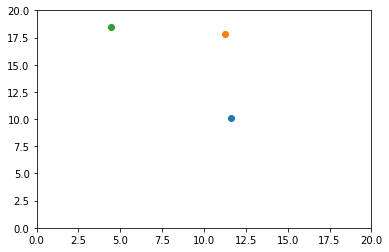

[[11.55403649 10.27349076]
 [11.19690256 17.75179251]
 [ 4.5900107  18.39530446]]


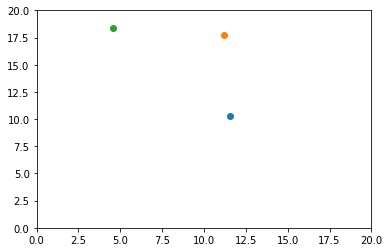

[[11.48082489 10.42949192]
 [11.13367286 17.68500463]
 [ 4.72435547 18.30854334]]


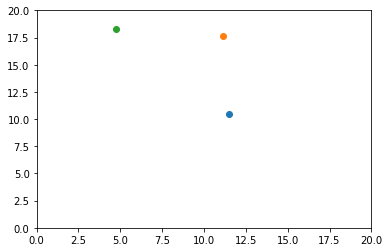

[[11.40978868 10.58083756]
 [11.07234085 17.62019834]
 [ 4.85468965 18.22438283]]


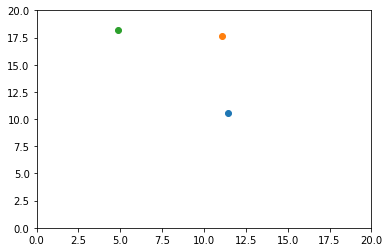

[[11.34086321 10.72766662]
 [11.01284956 17.55731487]
 [ 4.98113299 18.14274499]]


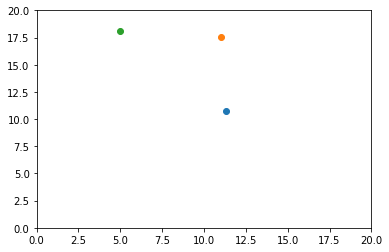

[[11.27398577 10.87011389]
 [10.95514376 17.49629716]
 [ 5.10380162 18.0635542 ]]


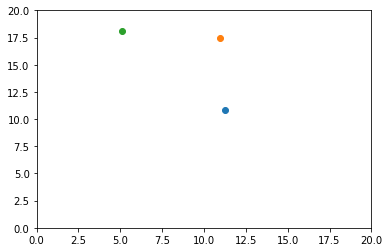

[[11.20909551 11.00831012]
 [10.89916985 17.43708986]
 [ 5.22280824 17.98673712]]


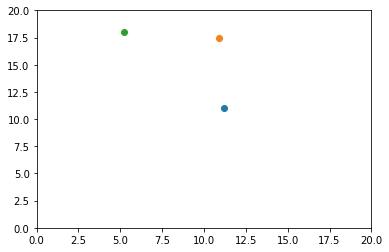

[[11.14613338 11.14238219]
 [10.84487587 17.37963926]
 [ 5.33826217 17.91222259]]


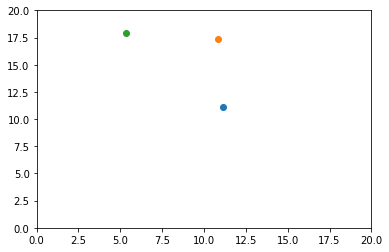

[[11.08504209 11.27245316]
 [10.7922114  17.32389323]
 [ 5.45026946 17.8399416 ]]


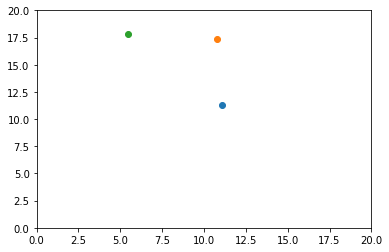

[[11.02576606 11.39864245]
 [10.74112752 17.26980121]
 [ 5.55893301 17.76982721]]


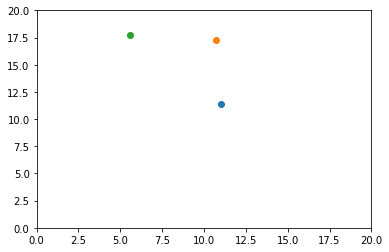

[[10.96825135 11.52106588]
 [10.69157682 17.21731411]
 [ 5.66435263 17.70181446]]


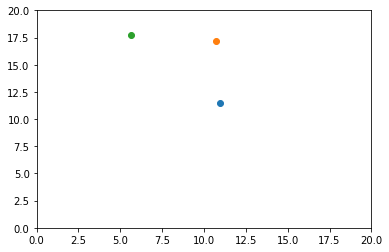

[[10.91244561 11.63983585]
 [10.64351326 17.16638433]
 [ 5.76662517 17.63584037]]


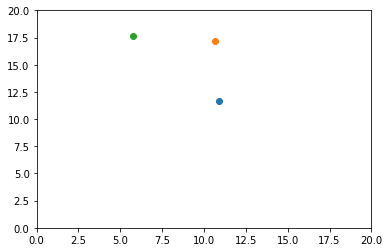

[[10.85829808 11.75506138]
 [10.59689223 17.11696566]
 [ 5.86584457 17.57184384]]


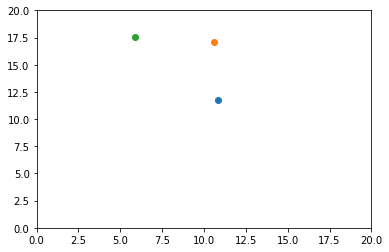

[[10.80575949 11.86684825]
 [10.55167043 17.06901327]
 [ 5.96210198 17.50976558]]


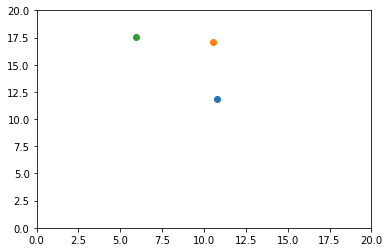

[[10.75478203 11.97529907]
 [10.50780586 17.02248365]
 [ 6.05548581 17.44954809]]


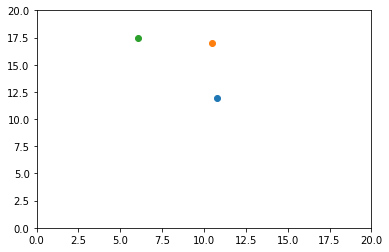

[[10.7053193  12.08051341]
 [10.46525779 16.97733459]
 [ 6.14608187 17.39113561]]


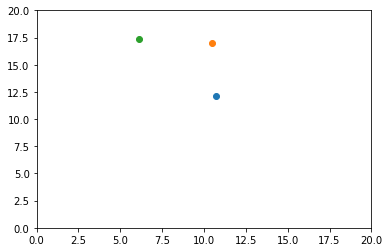

[[10.65732631 12.18258784]
 [10.42398672 16.93352514]
 [ 6.23397336 17.33447403]]


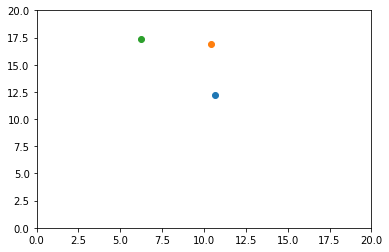

[[10.61075939 12.28161608]
 [10.38395431 16.89101554]
 [ 6.31924103 17.27951086]]


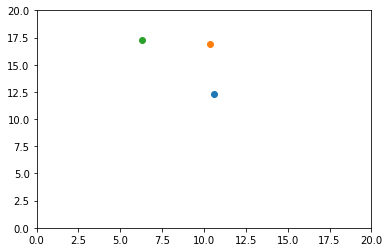

[[10.56557615 12.37768902]
 [10.3451234  16.84976722]
 [ 6.40196321 17.22619521]]


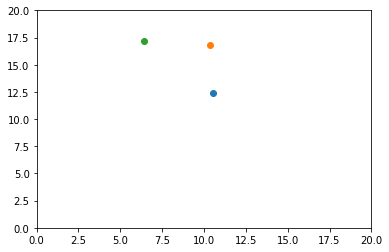

[[10.5217355  12.47089486]
 [10.30745792 16.80974278]
 [ 6.48221588 17.17447768]]


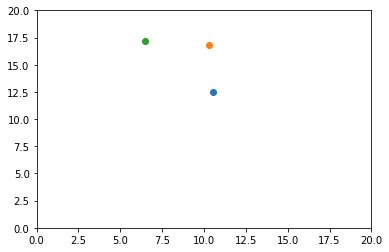

[[10.47919752 12.56131917]
 [10.27092289 16.77090589]
 [ 6.56007276 17.12431038]]


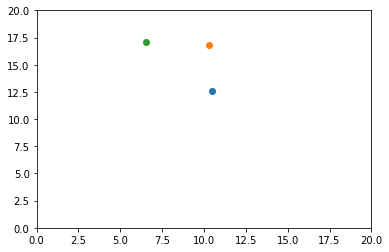

[[10.43792353 12.64904495]
 [10.2354844  16.73322133]
 [ 6.63560539 17.07564683]]


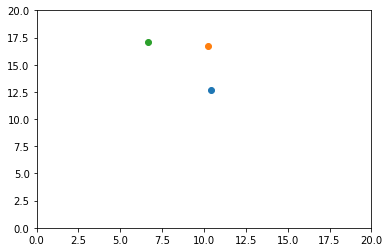

[[10.39787596 12.73415273]
 [10.20110952 16.6966549 ]
 [ 6.70888313 17.02844197]]


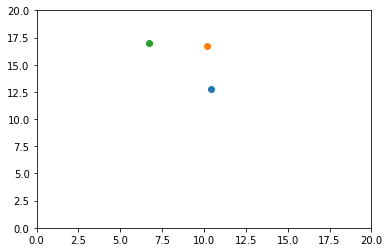

[[10.35901836 12.81672065]
 [10.16776635 16.66117343]
 [ 6.77997332 16.98265207]]


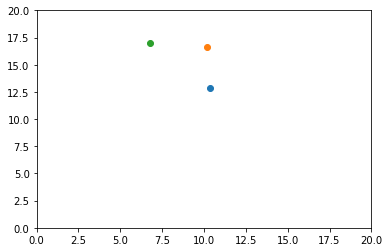

[[10.32131539 12.89682449]
 [10.13542391 16.62674472]
 [ 6.84894125 16.93823472]]


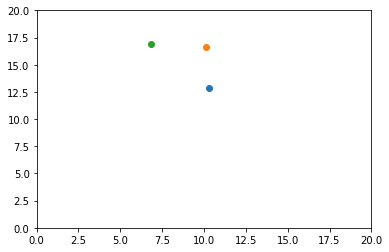

[[10.28473274 12.97453779]
 [10.10405217 16.59333755]
 [ 6.91585027 16.89514878]]


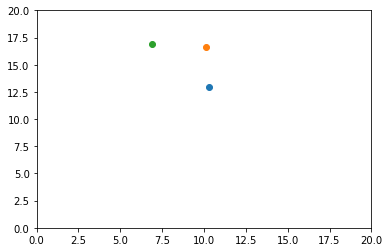

[[10.24923711 13.0499319 ]
 [10.073622   16.56092161]
 [ 6.98076186 16.85335434]]


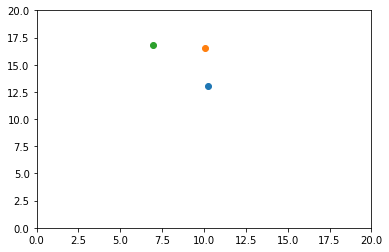

[[10.2147962  13.12307602]
 [10.04410514 16.52946748]
 [ 7.04373563 16.81281269]]


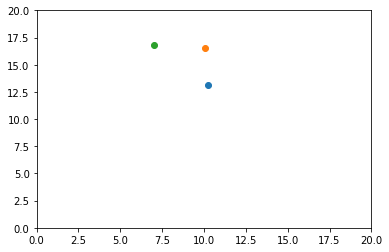

[[10.18137869 13.1940373 ]
 [10.01547418 16.49894663]
 [ 7.10482945 16.77348628]]


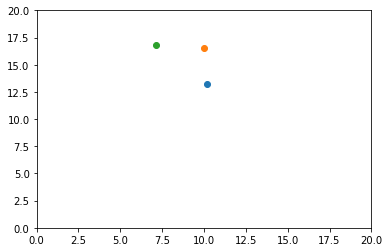

[[10.14895415 13.26288089]
 [ 9.98770253 16.46933137]
 [ 7.16409943 16.73533867]]


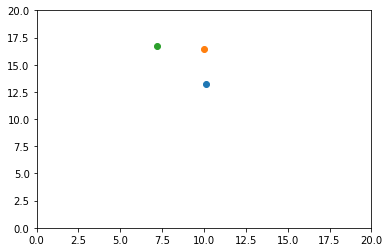

[[10.11749309 13.32966997]
 [ 9.96076441 16.44059483]
 [ 7.22160001 16.69833455]]


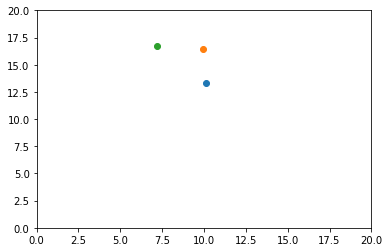

[[10.08696687 13.39446586]
 [ 9.93463479 16.41271094]
 [ 7.27738403 16.66243963]]


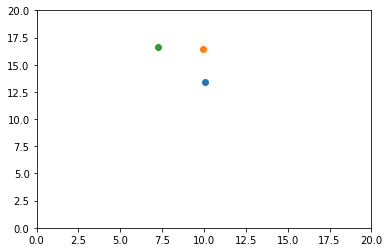

[[10.05734772 13.45732805]
 [ 9.90928941 16.38565439]
 [ 7.33150272 16.62762066]]


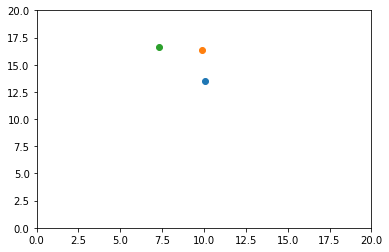

[[10.02860869 13.51831424]
 [ 9.88470474 16.35940066]
 [ 7.3840058  16.59384539]]


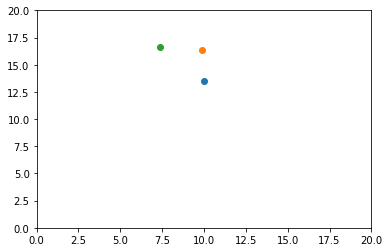

[[10.00072362 13.57748042]
 [ 9.86085794 16.3339259 ]
 [ 7.4349415  16.56108255]]


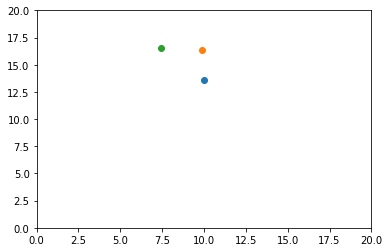

[[ 9.97366714 13.63488089]
 [ 9.83772686 16.30920702]
 [ 7.48435661 16.52930178]]


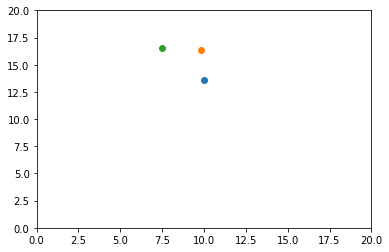

[[ 9.94741463 13.69056836]
 [ 9.81529004 16.28522158]
 [ 7.53229652 16.49847364]]


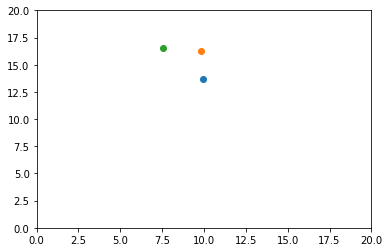

[[ 9.9219422  13.74459395]
 [ 9.79352662 16.26194782]
 [ 7.57880528 16.46856959]]


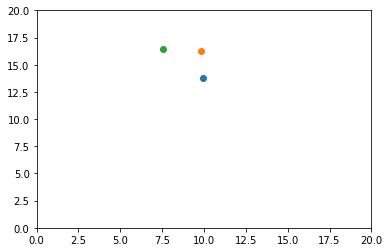

[[ 9.89722668 13.79700724]
 [ 9.77241641 16.23936463]
 [ 7.62392561 16.43956191]]


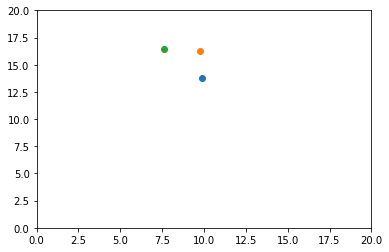

[[ 9.87324557 13.84785636]
 [ 9.7519398  16.21745152]
 [ 7.66769895 16.41142375]]


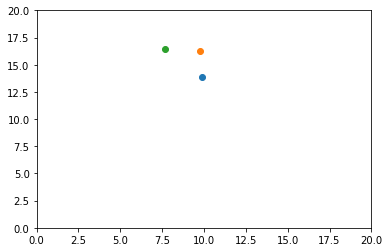

[[ 9.84997704 13.89718799]
 [ 9.73207776 16.19618861]
 [ 7.71016552 16.38412904]]


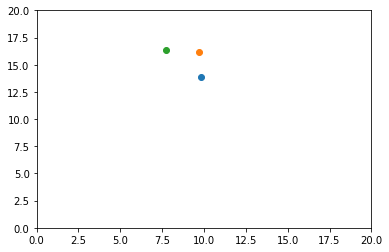

[[ 9.82739993 13.94504741]
 [ 9.71281186 16.1755566 ]
 [ 7.75136432 16.3576525 ]]


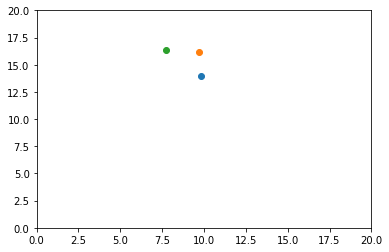

[[ 9.8054937  13.99147855]
 [ 9.6941242  16.15553678]
 [ 7.79133322 16.33196961]]


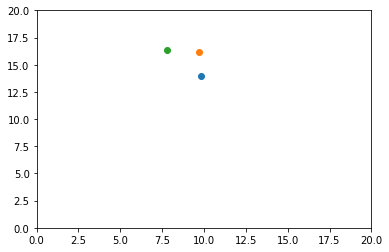

[[ 9.7842384  14.03652404]
 [ 9.67599743 16.13611098]
 [ 7.83010891 16.30705656]]


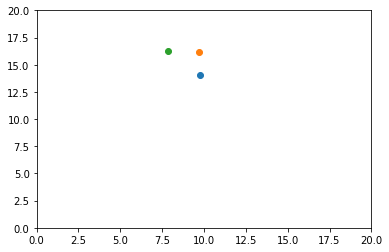

[[ 9.76361469 14.08022524]
 [ 9.65841472 16.11726158]
 [ 7.86772703 16.2828903 ]]


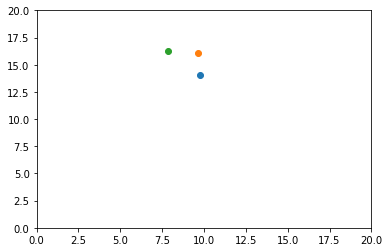

[[ 9.74360382 14.12262225]
 [ 9.64135973 16.09897148]
 [ 7.90422212 16.25944843]]


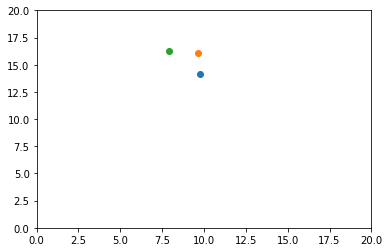

[[ 9.72418756 14.16375401]
 [ 9.62481664 16.08122407]
 [ 7.93962772 16.23670924]]


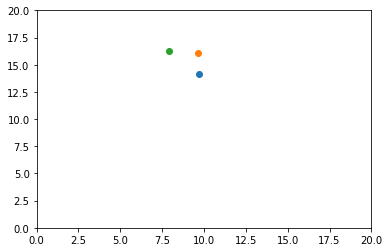

[[ 9.70534825 14.20365826]
 [ 9.60877006 16.06400326]
 [ 7.97397635 16.21465168]]


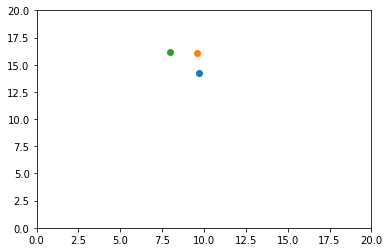

[[ 9.68706875 14.24237164]
 [ 9.59320511 16.04729343]
 [ 8.00729956 16.19325529]]


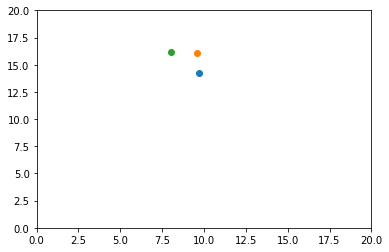

[[ 9.66933242 14.2799297 ]
 [ 9.57810733 16.03107941]
 [ 8.03962797 16.17250028]]


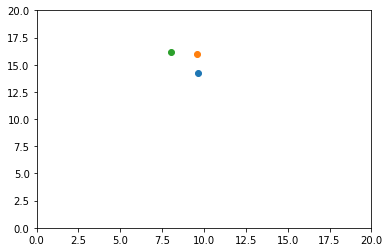

[[ 9.65212313 14.3163669 ]
 [ 9.5634627  16.0153465 ]
 [ 8.07099127 16.15236741]]


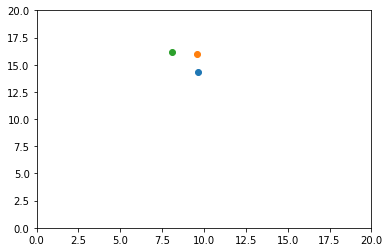

[[ 9.6354252  14.3517167 ]
 [ 9.54925761 16.00008041]
 [ 8.10141827 16.13283803]]


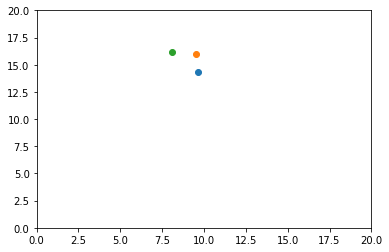

[[ 9.61922346 14.38601155]
 [ 9.53547887 15.9852673 ]
 [ 8.13093693 16.11389406]]


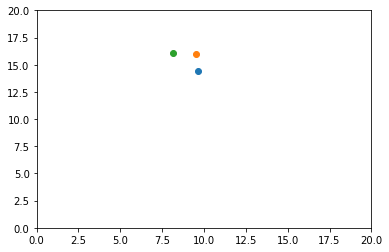

[[ 9.60350315 14.41928293]
 [ 9.52211369 15.97089372]
 [ 8.15957436 16.09551794]]


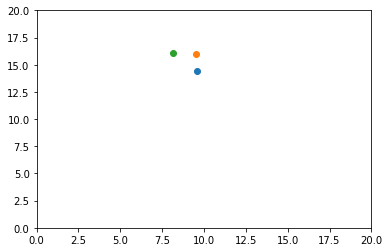

[[ 9.58824997 14.45156139]
 [ 9.50914966 15.95694664]
 [ 8.18735687 16.07769266]]


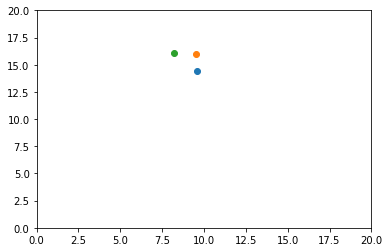

[[ 9.57345003 14.48287656]
 [ 9.49657474 15.9434134 ]
 [ 8.21430998 16.06040171]]


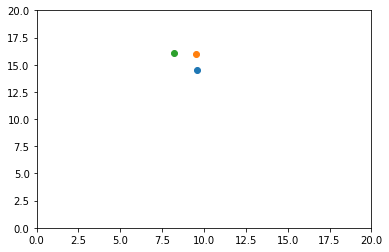

[[ 9.55908988 14.51325718]
 [ 9.48437724 15.93028172]
 [ 8.24045845 16.04362906]]


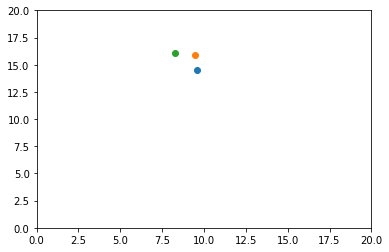

[[ 9.54515644 14.54273114]
 [ 9.47254585 15.91753969]
 [ 8.2658263  16.02735919]]


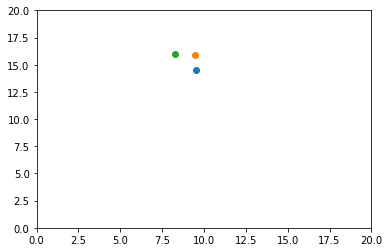

[[ 9.53163703 14.57132551]
 [ 9.46106956 15.90517574]
 [ 8.29043684 16.01157702]]


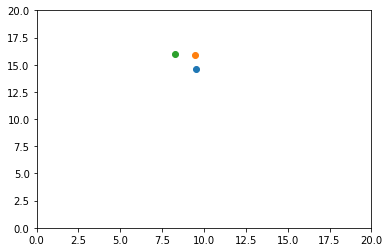

[[ 9.51851935 14.59906652]
 [ 9.44993773 15.89317866]
 [ 8.31431268 15.99626793]]


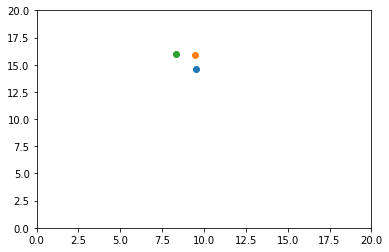

[[ 9.50579147 14.62597966]
 [ 9.43914002 15.88153756]
 [ 8.33747574 15.98141775]]


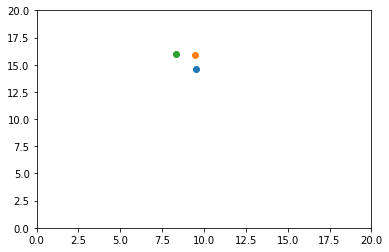

[[ 9.4934418  14.65208962]
 [ 9.4286664  15.87024189]
 [ 8.35994731 15.96701271]]


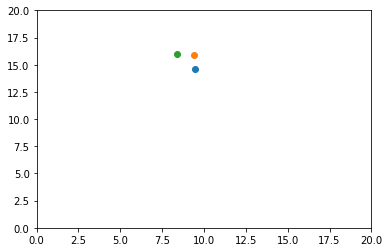

[[ 9.4814591  14.67742037]
 [ 9.41850713 15.85928138]
 [ 8.38174802 15.95303947]]


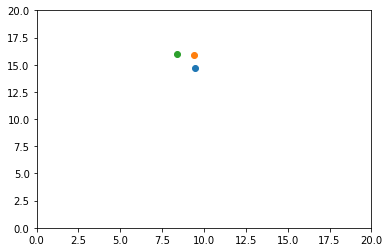

[[ 9.46983247 14.70199517]
 [ 9.40865279 15.8486461 ]
 [ 8.40289791 15.93948509]]


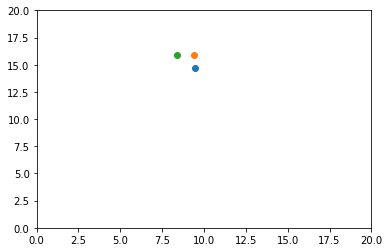

[[ 9.45855133 14.72583658]
 [ 9.39909423 15.83832639]
 [ 8.42341641 15.92633702]]


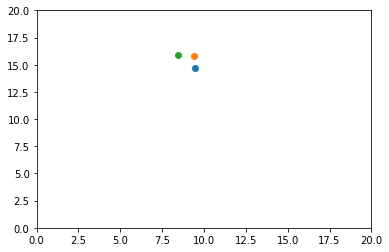

[[ 9.44760541 14.74896649]
 [ 9.38982256 15.8283129 ]
 [ 8.44332236 15.91358307]]


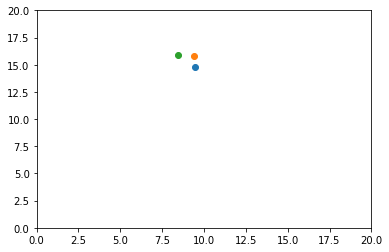

[[ 9.43698475 14.77140612]
 [ 9.38082918 15.81859653]
 [ 8.46263405 15.90121144]]


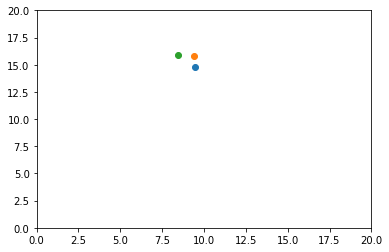

[[ 9.42667969 14.79317607]
 [ 9.37210574 15.80916848]
 [ 8.48136923 15.88921066]]


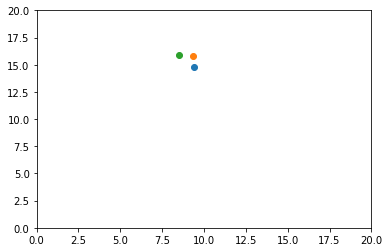

[[ 9.41668084 14.81429634]
 [ 9.36364412 15.80002018]
 [ 8.49954509 15.87756961]]


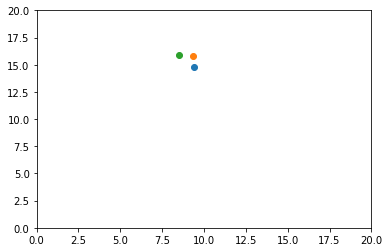

[[ 9.40697912 14.83478631]
 [ 9.35543648 15.79114333]
 [ 8.51717835 15.86627751]]


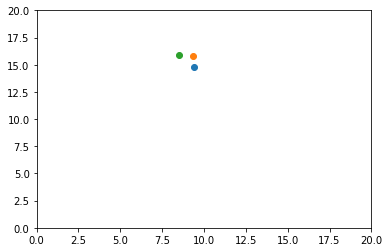

[[ 9.39756568 14.8546648 ]
 [ 9.34747519 15.78252989]
 [ 8.53428519 15.85532391]]


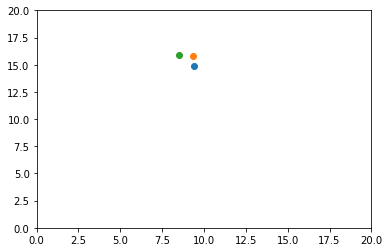

[[ 9.38843197 14.87395004]
 [ 9.33975286 15.77417203]
 [ 8.55088133 15.84469865]]


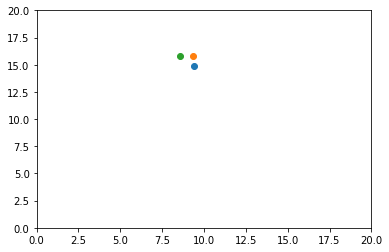

[[ 9.37956968 14.89265974]
 [ 9.33226232 15.76606218]
 [ 8.56698203 15.8343919 ]]


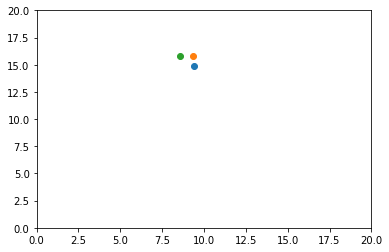

[[ 9.37097073 14.91081109]
 [ 9.3249966  15.75819296]
 [ 8.58260206 15.8243941 ]]


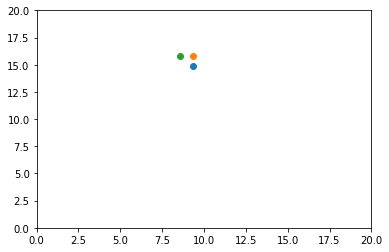

[[ 9.3626273  14.92842074]
 [ 9.31794896 15.75055725]
 [ 8.59775578 15.814696  ]]


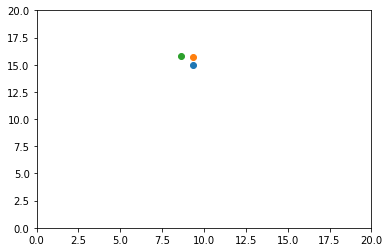

[[ 9.3545318  14.94550486]
 [ 9.31111285 15.74314811]
 [ 8.61245711 15.80528861]]


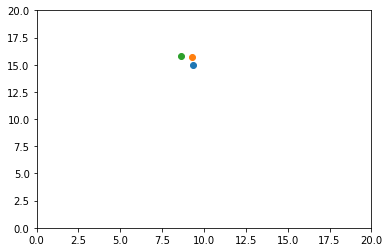

[[ 9.34667686 14.96207913]
 [ 9.30448194 15.73595883]
 [ 8.62671956 15.79616321]]


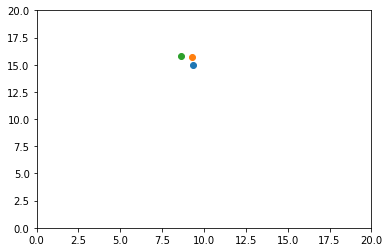

[[ 9.33905534 14.97815876]
 [ 9.29805005 15.72898287]
 [ 8.64055622 15.78731137]]


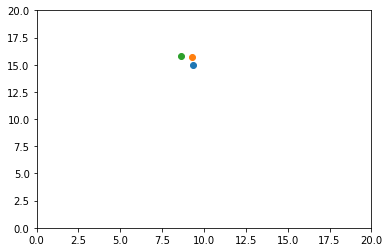

[[ 9.3316603  14.99375853]
 [ 9.29181121 15.72221391]
 [ 8.65397981 15.77872486]]


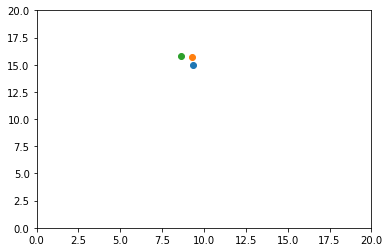

[[ 9.324485   15.00889275]
 [ 9.28575964 15.71564581]
 [ 8.66700266 15.77039575]]


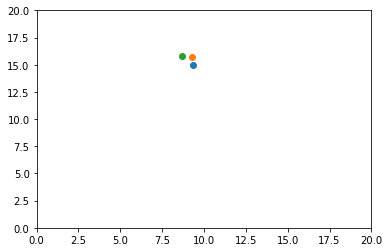

[[ 9.31752292 15.02357531]
 [ 9.2798897  15.70927261]
 [ 8.67963673 15.76231632]]


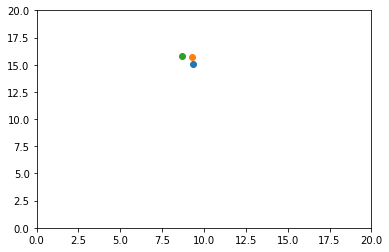

[[ 9.31076773 15.03781969]
 [ 9.27419595 15.70308851]
 [ 8.69189364 15.75447907]]


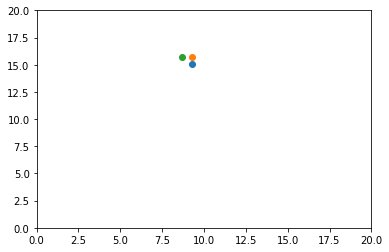

[[ 9.30421327 15.05163897]
 [ 9.2686731  15.69708792]
 [ 8.70378463 15.74687676]]


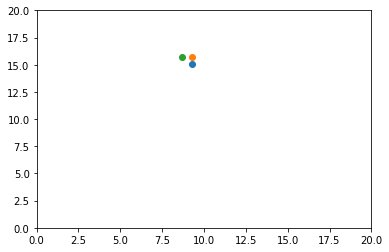

[[ 9.29785358 15.06504584]
 [ 9.26331602 15.69126539]
 [ 8.71532063 15.73950234]]


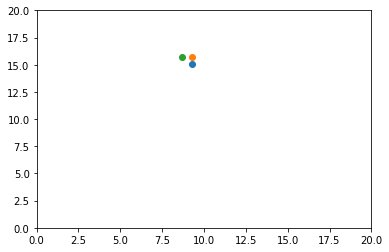

[[ 9.29168288 15.0780526 ]
 [ 9.25811973 15.68561563]
 [ 8.72651224 15.73234897]]


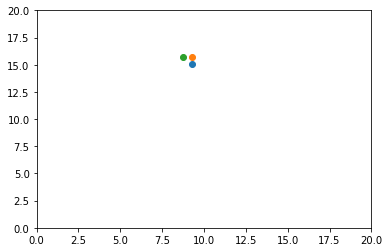

[[ 9.28569554 15.0906712 ]
 [ 9.25307942 15.68013352]
 [ 8.73736975 15.72541004]]


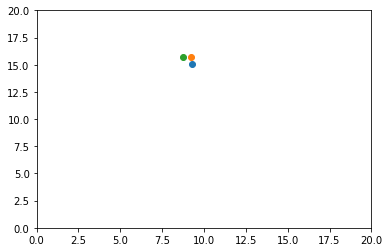

[[ 9.27988612 15.10291321]
 [ 9.24819039 15.67481408]
 [ 8.74790312 15.71867911]]


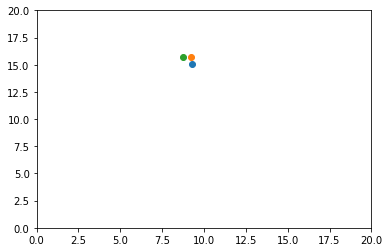

[[ 9.27424933 15.11478988]
 [ 9.2434481  15.66965249]
 [ 8.75812203 15.71214995]]


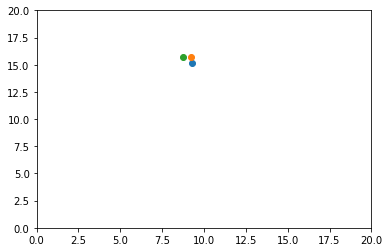

[[ 9.26878005 15.1263121 ]
 [ 9.23884816 15.66464406]
 [ 8.76803587 15.70581652]]


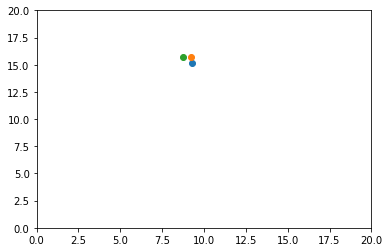

[[ 9.26347329 15.13749047]
 [ 9.23438629 15.65978425]
 [ 8.77765375 15.69967293]]


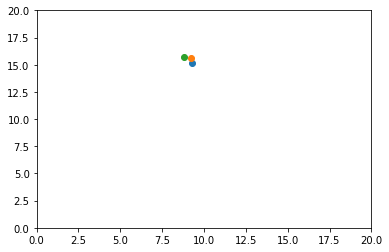

[[ 9.25832422 15.14833523]
 [ 9.23005835 15.65506865]
 [ 8.7869845  15.69371351]]


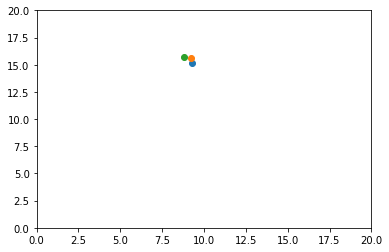

[[ 9.25332817 15.15885635]
 [ 9.22586031 15.65049297]
 [ 8.7960367  15.68793274]]


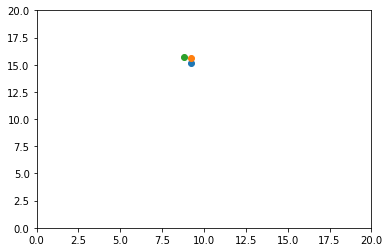

[[ 9.24848057 15.16906348]
 [ 9.22178827 15.64605308]
 [ 8.80481865 15.68232525]]


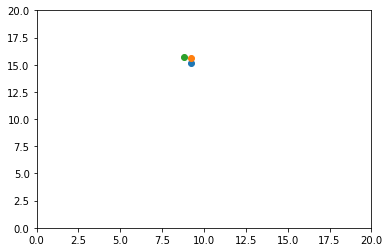

[[ 9.24377703 15.17896599]
 [ 9.21783846 15.64174493]
 [ 8.81333843 15.67688585]]


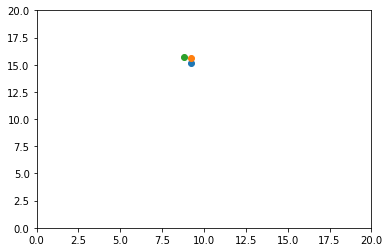

[[ 9.23921326 15.18857298]
 [ 9.21400721 15.63756462]
 [ 8.82160387 15.67160951]]


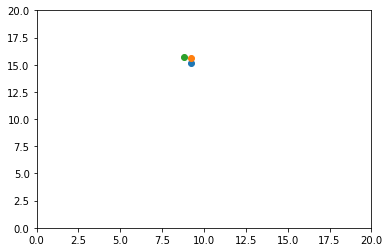

[[ 9.2347851  15.19789326]
 [ 9.21029096 15.63350835]
 [ 8.82962255 15.66649134]]


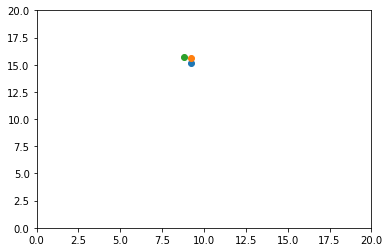

[[ 9.23048854 15.20693539]
 [ 9.20668625 15.62957245]
 [ 8.83740185 15.66152659]]


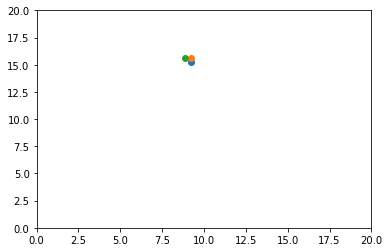

[[ 9.22631965 15.21570767]
 [ 9.20318974 15.62575335]
 [ 8.84494891 15.65671067]]


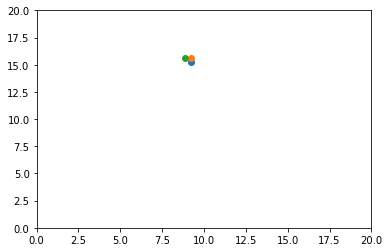

[[ 9.22227464 15.22421816]
 [ 9.19979818 15.62204757]
 [ 8.85227066 15.65203911]]


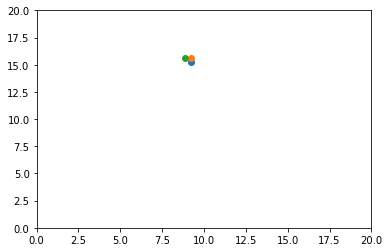

[[ 9.21834984 15.23247466]
 [ 9.19650842 15.61845175]
 [ 8.85937382 15.64750759]]


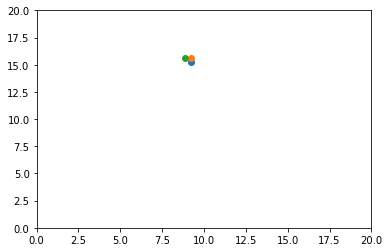

[[ 9.21454166 15.24048476]
 [ 9.19331741 15.61496264]
 [ 8.86626494 15.64311191]]


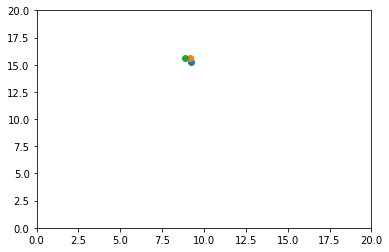

[[ 9.21084665 15.24825581]
 [ 9.19022217 15.61157707]
 [ 8.87295033 15.63884801]]


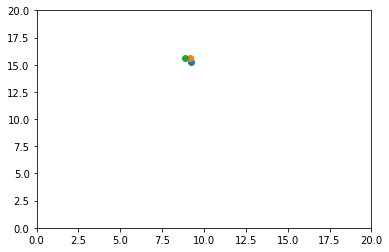

[[ 9.20726144 15.25579495]
 [ 9.18721985 15.60829196]
 [ 8.87943613 15.63471191]]


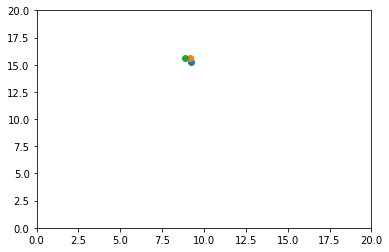

[[ 9.20378278 15.26310909]
 [ 9.18430764 15.60510433]
 [ 8.88572832 15.63069981]]


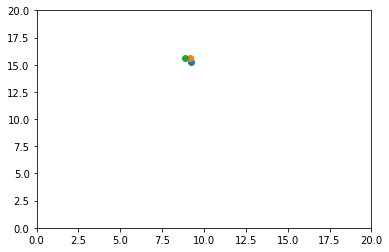

[[ 9.20040748 15.27020495]
 [ 9.18148285 15.60201129]
 [ 8.89183265 15.62680798]]


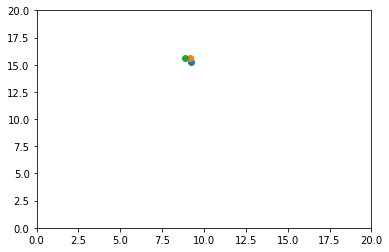

[[ 9.19713248 15.27708904]
 [ 9.17874284 15.59901003]
 [ 8.89775475 15.62303281]]


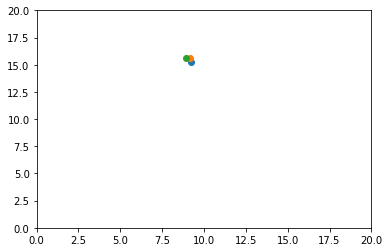

[[ 9.19395481 15.28376769]
 [ 9.17608508 15.59609784]
 [ 8.90350006 15.61937081]]


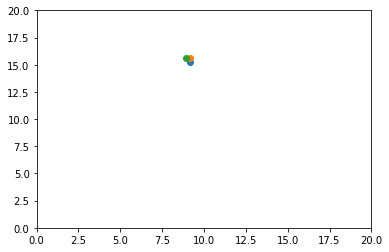

[[ 9.19087157 15.29024702]
 [ 9.17350709 15.59327206]
 [ 8.90907384 15.61581858]]


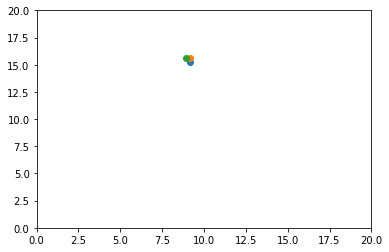

[[ 9.18787994 15.29653299]
 [ 9.17100649 15.59053013]
 [ 8.91448123 15.61237284]]


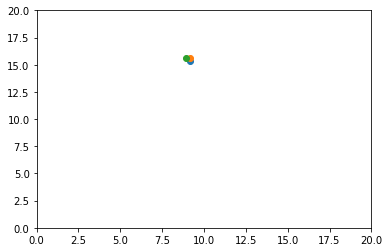

[[ 9.18497722 15.30263136]
 [ 9.16858094 15.58786957]
 [ 8.91972719 15.60903039]]


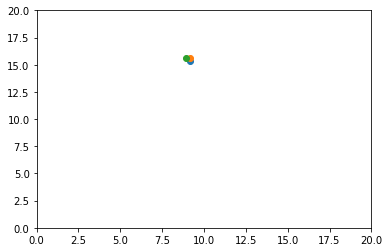

[[ 9.18216076 15.30854773]
 [ 9.1662282  15.58528796]
 [ 8.92481653 15.60578814]]


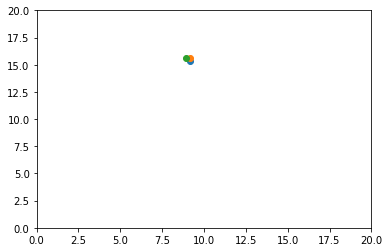

[[ 9.17942799 15.31428754]
 [ 9.16394609 15.58278296]
 [ 8.92975394 15.60264308]]


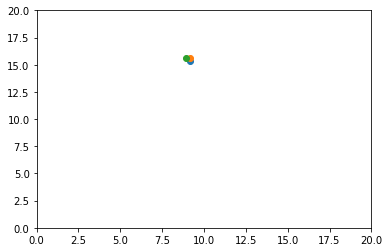

[[ 9.17677643 15.31985605]
 [ 9.16173247 15.58035229]
 [ 8.93454395 15.59959231]]


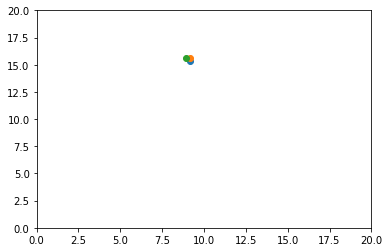

[[ 9.17420367 15.32525837]
 [ 9.15958529 15.57799375]
 [ 8.93919096 15.59663298]]


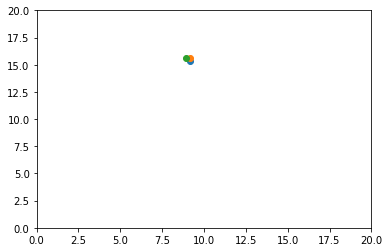

[[ 9.17170736 15.33049947]
 [ 9.15750257 15.5757052 ]
 [ 8.94369924 15.59376237]]


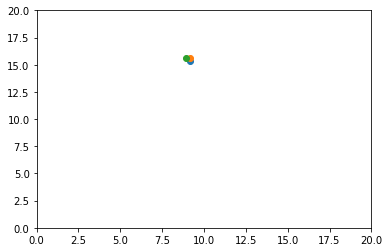

[[ 9.16928523 15.33558416]
 [ 9.15548237 15.57348456]
 [ 8.94807293 15.59097781]]


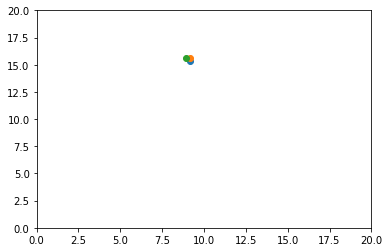

[[ 9.16693508 15.3405171 ]
 [ 9.1535228  15.57132982]
 [ 8.95231605 15.58827672]]


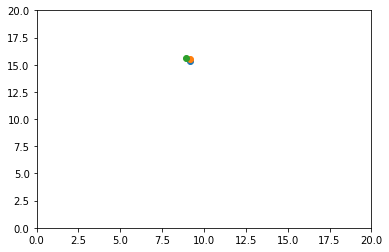

[[ 9.16465476 15.34530282]
 [ 9.15162205 15.56923902]
 [ 8.9564325  15.58565661]]


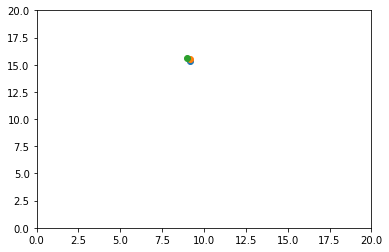

[[ 9.16244221 15.34994572]
 [ 9.14977836 15.56721026]
 [ 8.96042606 15.58311503]]


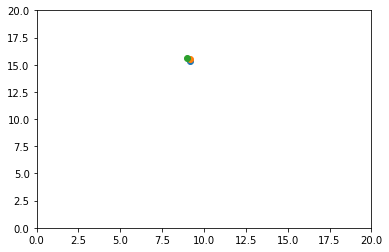

[[ 9.16029541 15.35445006]
 [ 9.14799    15.56524171]
 [ 8.96430039 15.58064965]]


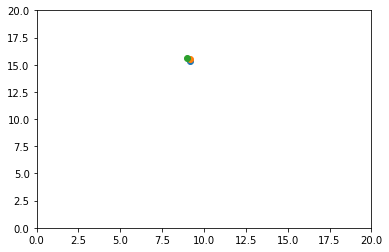

[[ 9.15821241 15.35881997]
 [ 9.14625533 15.56333157]
 [ 8.96805906 15.57825817]]


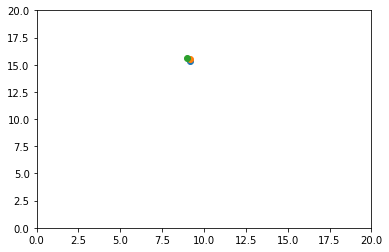

[[ 9.1561913  15.36305947]
 [ 9.14457273 15.56147812]
 [ 8.97170552 15.57593838]]


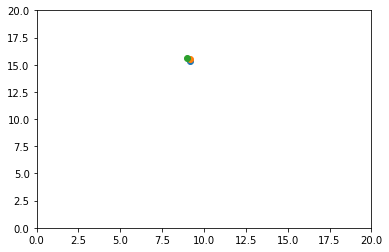

[[ 9.15423026 15.36717245]
 [ 9.14294063 15.55967966]
 [ 8.97524312 15.57368814]]


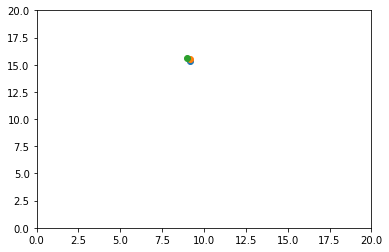

[[ 9.15232749 15.37116268]
 [ 9.14135753 15.55793458]
 [ 8.97867511 15.57150535]]


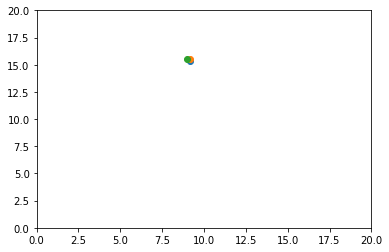

[[ 9.15048127 15.37503382]
 [ 9.13982194 15.55624128]
 [ 8.98200464 15.56938799]]


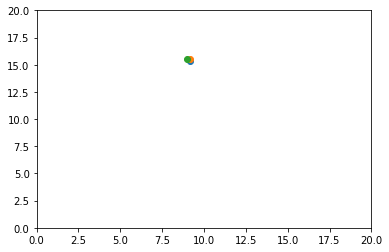

[[ 9.14868991 15.37878944]
 [ 9.13833245 15.55459823]
 [ 8.98523477 15.56733411]]


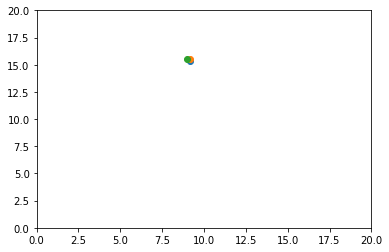

[[ 9.14695178 15.38243297]
 [ 9.13688766 15.55300393]
 [ 8.98836847 15.5653418 ]]


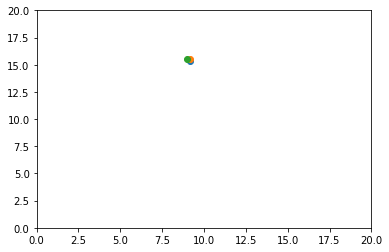

[[ 9.14526531 15.38596777]
 [ 9.13548625 15.55145695]
 [ 8.99140861 15.56340921]]


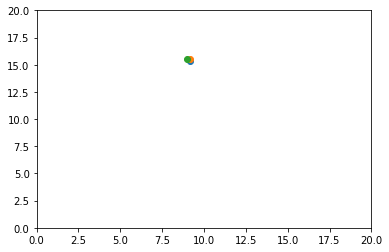

[[ 9.14362895 15.38939708]
 [ 9.1341269  15.54995587]
 [ 8.994358   15.56153455]]


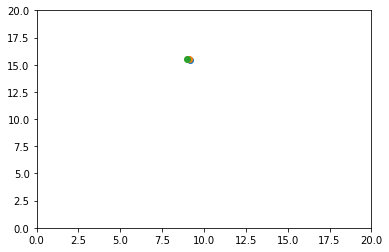

[[ 9.14204122 15.39272404]
 [ 9.13280835 15.54849934]
 [ 8.99721933 15.55971609]]


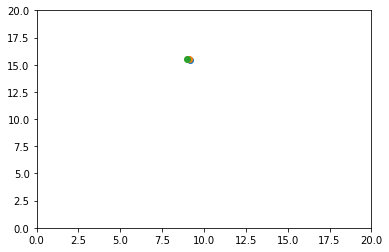

[[ 9.14050067 15.39595171]
 [ 9.13152938 15.54708603]
 [ 8.99999525 15.55795215]]


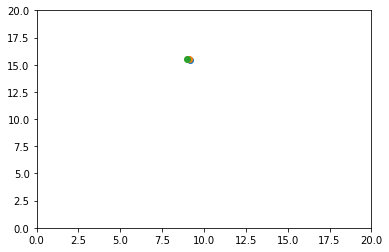

In [39]:
# Store a list of trajectories
x_traj = []
x_traj.append(x)
err = rendezvous_error(x)
while err>0.5:
    # Create x_diff list which stores difference between current pose and desired pose
    x_diff = []
    for i in range(num_robots):
        x_diff.append(np.array([0.,0.]))
    # Calculate the point to move towards
    for i in range(num_robots):
        for j in range(num_robots):
            if j == i:
                continue
            x_diff[i] += x[i] - x[j] 
        theta = (np.arctan2(x_diff[i][1], x_diff[i][0]) + np.pi) % (2 * np.pi) - np.pi
        dist = np.hypot(x_diff[i][0], x_diff[i][1])
        x[i][0] = x[i][0] -  dist * np.cos(theta) * dt
        x[i][1] = x[i][1] -  dist * np.sin(theta) * dt
    
    err = rendezvous_error(x)
    print(x)
    plt.cla()
    for robot_pose in x:
        _ = plt.scatter(robot_pose[0], robot_pose[1])
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    plt.pause(0.1)
    plt.show()

In [75]:
# Ensemble level dynamics
# The laplacian
lapl = np.ndarray((num_robots, num_robots))
lapl.fill(-1)
np.fill_diagonal(lapl, num_robots-1)
lapl

array([[ 2., -1., -1.],
       [-1.,  2., -1.],
       [-1., -1.,  2.]])

In [70]:
dx = np.kron(lapl, np.identity(p)) @ x.flatten()
dx = dx.reshape((num_robots, 2))
print(x)
print(x[:,1], x[:,0])

[[20.92793958  6.80108047]
 [15.65202911  6.65800397]
 [17.6884343  -1.9212308 ]]
[ 6.80108047  6.65800397 -1.9212308 ] [20.92793958 15.65202911 17.6884343 ]


[[ 3.5352  5.9748]
 [ 4.6701  3.0357]
 [12.6047 15.1995]]


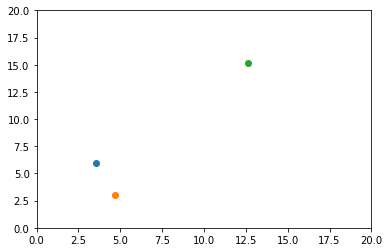

[[ 3.637244  6.037656]
 [ 4.738097  3.186729]
 [12.434659 14.985615]]


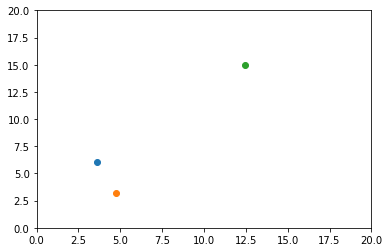

[[ 3.73622668  6.09862632]
 [ 4.80405409  3.33322713]
 [12.26971923 14.77814655]]


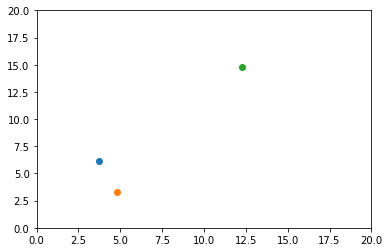

[[ 3.83223988  6.15776753]
 [ 4.86803247  3.47533032]
 [12.10972765 14.57690215]]


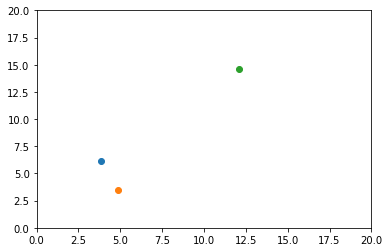

[[ 3.92537268  6.2151345 ]
 [ 4.93009149  3.61317041]
 [11.95453582 14.38169509]]


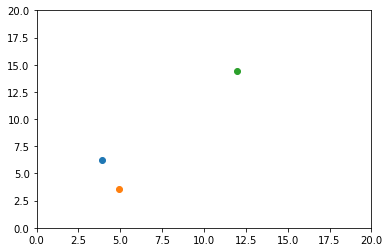

[[ 4.0157115   6.27078047]
 [ 4.99028875  3.74687529]
 [11.80399975 14.19234424]]


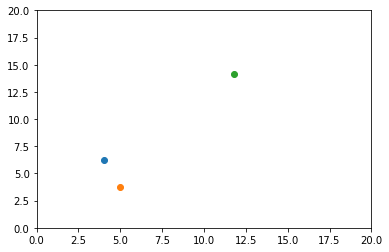

[[ 4.10334016  6.32475706]
 [ 5.04868009  3.87656904]
 [11.65797976 14.00867391]]


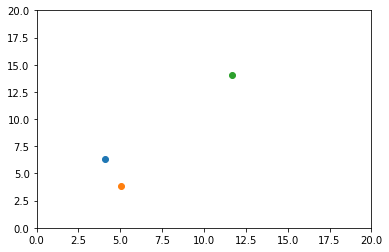

[[ 4.18833995  6.37711434]
 [ 5.10531968  4.00237196]
 [11.51634036 13.83051369]]


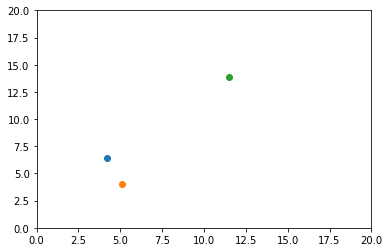

[[ 4.27078975  6.42790091]
 [ 5.16026009  4.12440081]
 [11.37895015 13.65769828]]


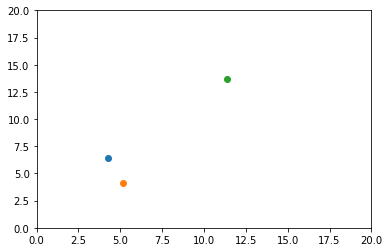

[[ 4.35076606  6.47716389]
 [ 5.21355229  4.24276878]
 [11.24568165 13.49006733]]


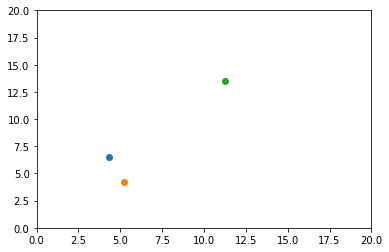

[[ 4.42834308  6.52494897]
 [ 5.26524572  4.35758572]
 [11.1164112  13.32746531]]


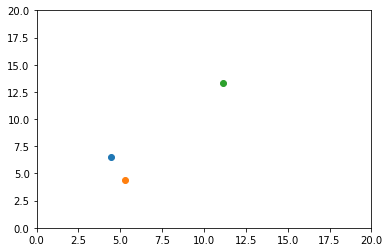

[[ 4.50359279  6.5713005 ]
 [ 5.31538835  4.46895815]
 [10.99101886 13.16974135]]


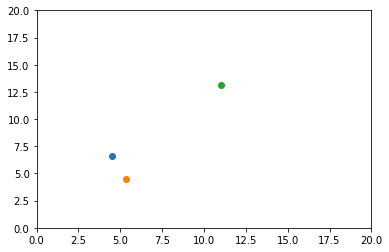

[[ 4.576585    6.61626149]
 [ 5.3640267   4.5769894 ]
 [10.8693883  13.01674911]]


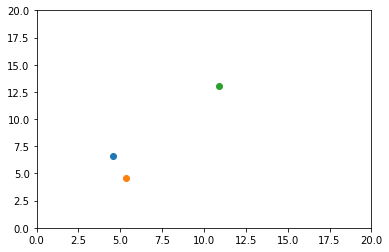

[[ 4.64738745  6.65987364]
 [ 5.4112059   4.68177972]
 [10.75140665 12.86834664]]


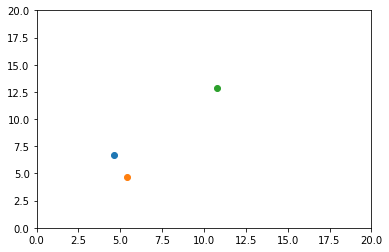

[[ 4.71606583  6.70217743]
 [ 5.45696972  4.78342633]
 [10.63696445 12.72439624]]


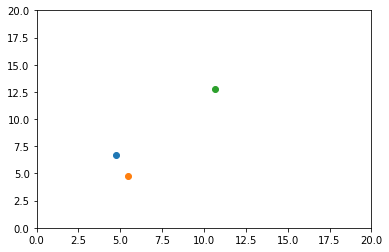

[[ 4.78268386  6.74321211]
 [ 5.50136063  4.88202354]
 [10.52595552 12.58476435]]


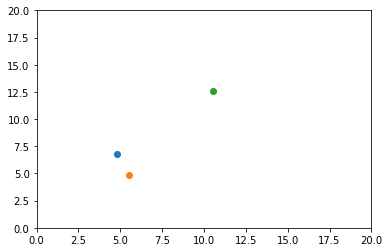

[[ 4.84730334  6.78301575]
 [ 5.54441981  4.97766283]
 [10.41827685 12.44932142]]


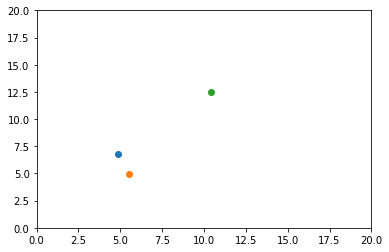

[[ 4.90998424  6.82162527]
 [ 5.58618722  5.07043295]
 [10.31382854 12.31794178]]


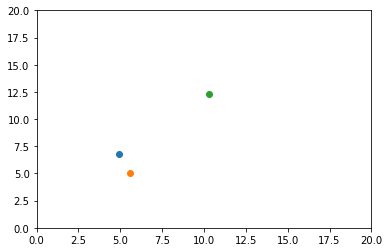

[[ 4.97078471  6.85907651]
 [ 5.6267016   5.16041996]
 [10.21251369 12.19050353]]


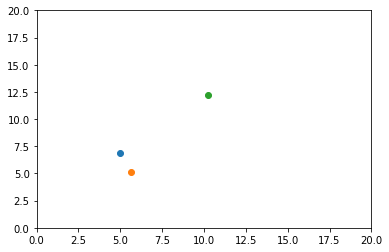

[[ 5.02976117  6.89540422]
 [ 5.66600055  5.24770736]
 [10.11423828 12.06688842]]


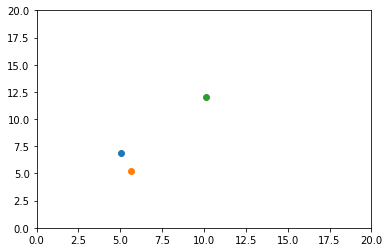

[[ 5.08696834  6.93064209]
 [ 5.70412054  5.33237614]
 [10.01891113 11.94698177]]


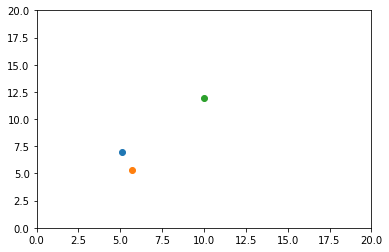

[[ 5.14245929  6.96482283]
 [ 5.74109692  5.41450486]
 [ 9.92644379 11.83067231]]


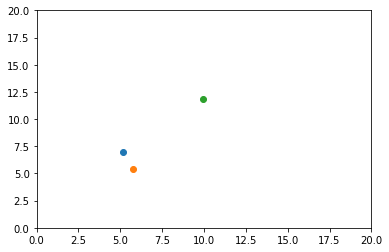

[[ 5.19628551  6.99797815]
 [ 5.77696401  5.49416971]
 [ 9.83675048 11.71785215]]


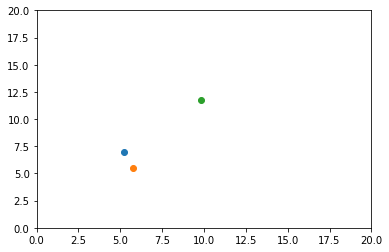

[[ 5.24849694  7.0301388 ]
 [ 5.81175509  5.57144462]
 [ 9.74974797 11.60841658]]


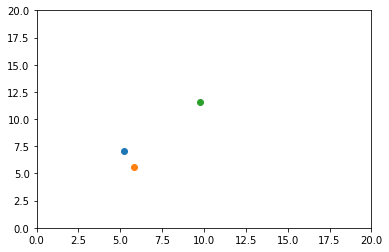

[[ 5.29914203  7.06133464]
 [ 5.84550244  5.64640128]
 [ 9.66535553 11.50226408]]


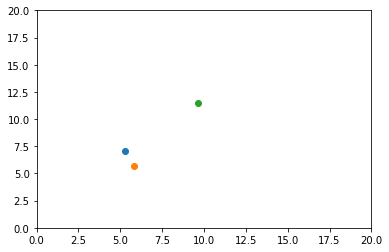

[[ 5.34826777  7.0915946 ]
 [ 5.87823737  5.71910924]
 [ 9.58349486 11.39929616]]


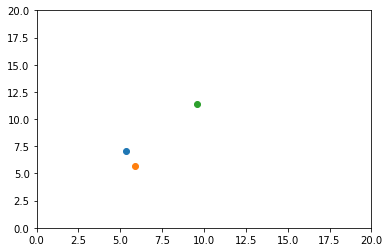

[[ 5.39591974  7.12094676]
 [ 5.90999024  5.78963596]
 [ 9.50409002 11.29941728]]


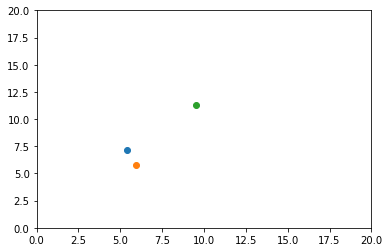

[[ 5.44214215  7.14941836]
 [ 5.94079054  5.85804689]
 [ 9.42706732 11.20253476]]


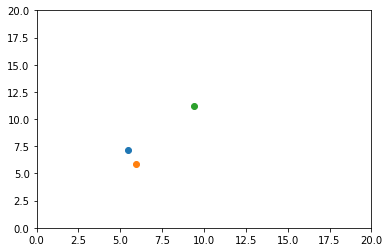

[[ 5.48697788  7.17703581]
 [ 5.97066682  5.92440548]
 [ 9.3523553  11.10855872]]


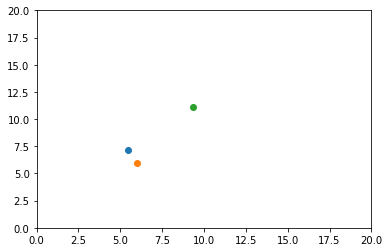

[[ 5.53046855  7.20382473]
 [ 5.99964682  5.98877331]
 [ 9.27988464 11.01740195]]


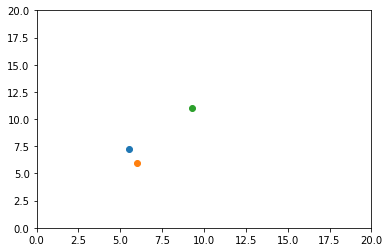

[[ 5.57265449  7.22980999]
 [ 6.02775741  6.05121011]
 [ 9.2095881  10.9289799 ]]


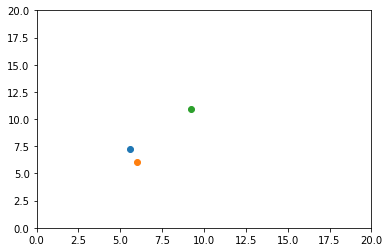

[[ 5.61357486  7.25501569]
 [ 6.05502469  6.11177381]
 [ 9.14140046 10.8432105 ]]


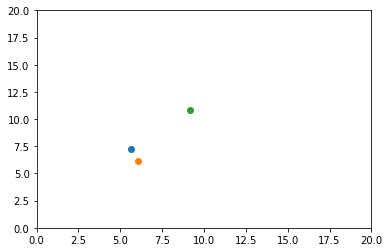

[[ 5.65326761  7.27946522]
 [ 6.08147395  6.1705206 ]
 [ 9.07525844 10.76001418]]


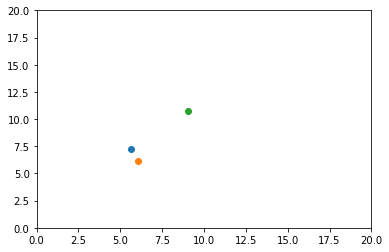

[[ 5.69176958  7.30318126]
 [ 6.10712973  6.22750498]
 [ 9.01110069 10.67931376]]


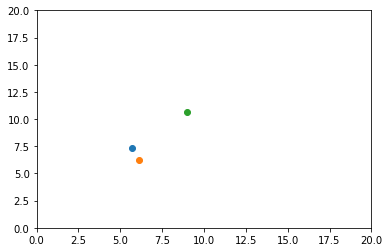

[[ 5.72911649  7.32618583]
 [ 6.13201584  6.28277983]
 [ 8.94886767 10.60103435]]


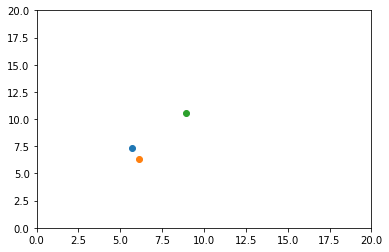

[[ 5.765343    7.34850025]
 [ 6.15615536  6.33639643]
 [ 8.88850164 10.52510331]]


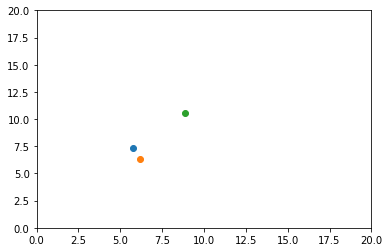

[[ 5.80048271  7.37014524]
 [ 6.1795707   6.38840454]
 [ 8.82994659 10.45145022]]


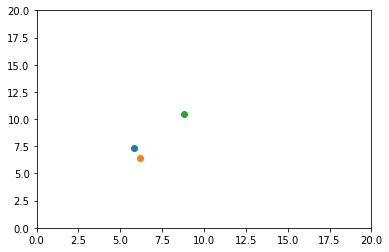

[[ 5.83456823  7.39114089]
 [ 6.20228358  6.43885241]
 [ 8.77314819 10.38000671]]


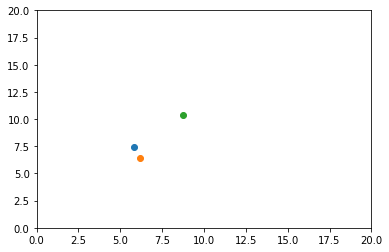

[[ 5.86763118  7.41150666]
 [ 6.22431507  6.48778683]
 [ 8.71805375 10.31070651]]


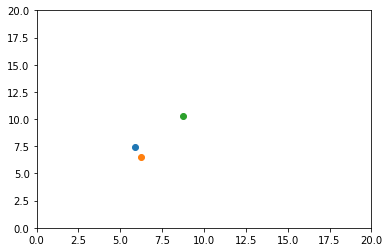

[[ 5.89970225  7.43126146]
 [ 6.24568562  6.53525323]
 [ 8.66461213 10.24348531]]


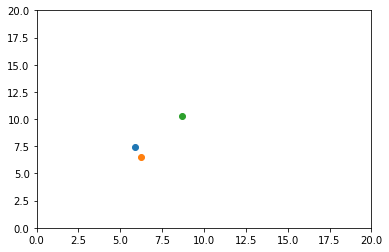

[[ 5.93081118  7.45042362]
 [ 6.26641505  6.58129563]
 [ 8.61277377 10.17828075]]


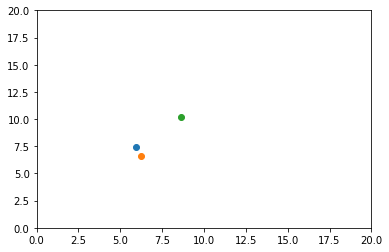

[[ 5.96098684  7.46901091]
 [ 6.2865226   6.62595676]
 [ 8.56249056 10.11503233]]


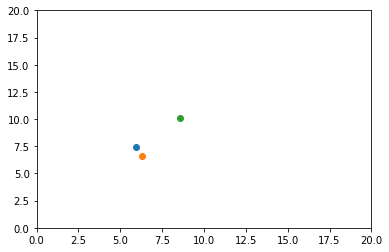

[[ 5.99025724  7.48704058]
 [ 6.30602692  6.66927806]
 [ 8.51371584 10.05368136]]


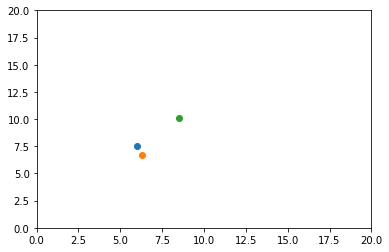

[[6.01864952 7.50452936]
 [6.32494612 6.71129972]
 [8.46640436 9.99417092]]


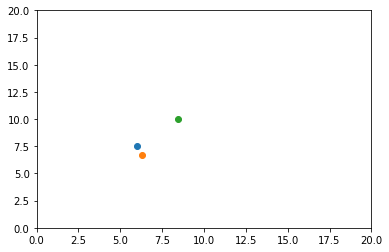

[[6.04619003 7.52149348]
 [6.34329773 6.75206073]
 [8.42051223 9.93644579]]


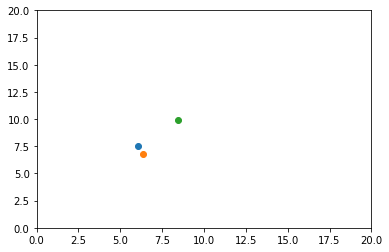

[[6.07290433 7.53794868]
 [6.3610988  6.7915989 ]
 [8.37599687 9.88045242]]


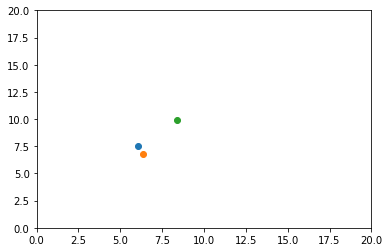

[[6.0988172  7.55391022]
 [6.37836584 6.82995094]
 [8.33281696 9.82613885]]


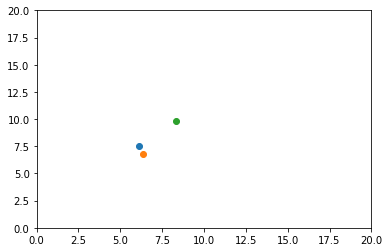

[[6.12395269 7.56939291]
 [6.39511486 6.86715241]
 [8.29093245 9.77345468]]


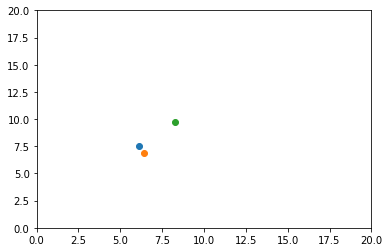

[[6.14833411 7.58441112]
 [6.41136142 6.90323784]
 [8.25030448 9.72235104]]


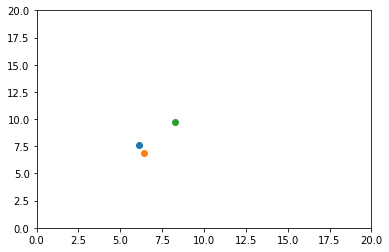

[[6.17198408 7.59897879]
 [6.42712057 6.9382407 ]
 [8.21089534 9.67278051]]


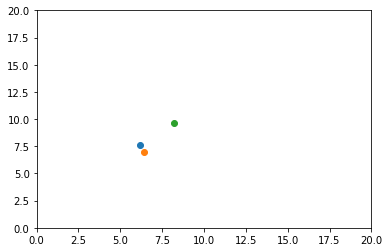

[[6.19492456 7.61310943]
 [6.44240696 6.97219348]
 [8.17266848 9.62469709]]


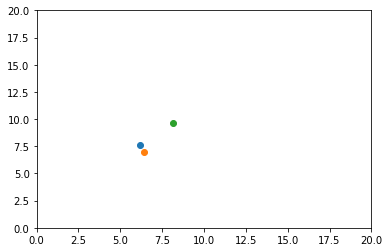

[[6.21717682 7.62681614]
 [6.45723475 7.00512768]
 [8.13558843 9.57805618]]


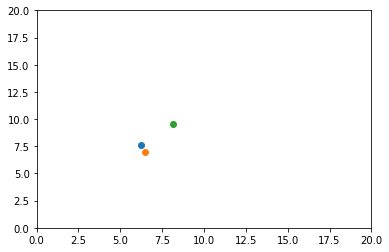

[[6.23876152 7.64011166]
 [6.4716177  7.03707385]
 [8.09962078 9.5328145 ]]


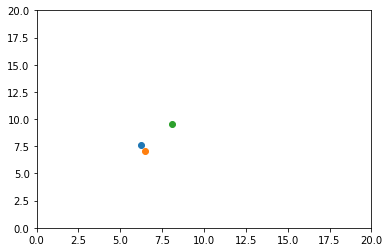

[[6.25969867 7.65300831]
 [6.48556917 7.06806163]
 [8.06473215 9.48893006]]


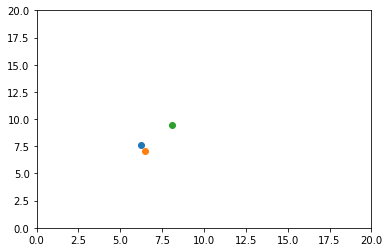

[[6.28000771 7.66551806]
 [6.4991021  7.09811978]
 [8.03089019 9.44636216]]


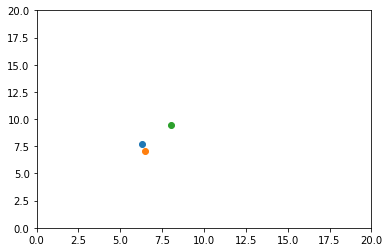

[[6.29970748 7.67765252]
 [6.51222904 7.12727619]
 [7.99806348 9.40507129]]


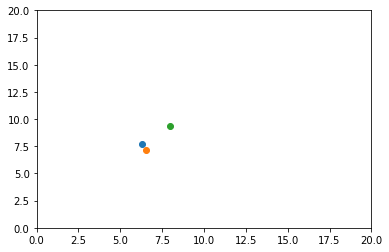

[[6.31881626 7.68942294]
 [6.52496216 7.1555579 ]
 [7.96622158 9.36501916]]


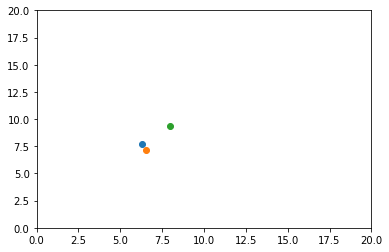

[[6.33735177 7.70084025]
 [6.5373133  7.18299117]
 [7.93533493 9.32616858]]


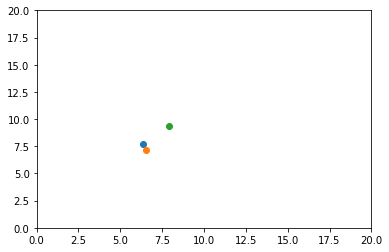

[[6.35533122 7.71191505]
 [6.5492939  7.20960143]
 [7.90537488 9.28848352]]


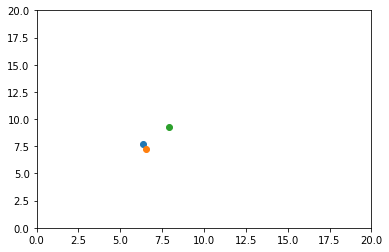

[[6.37277128 7.72265759]
 [6.56091508 7.23541339]
 [7.87631364 9.25192902]]


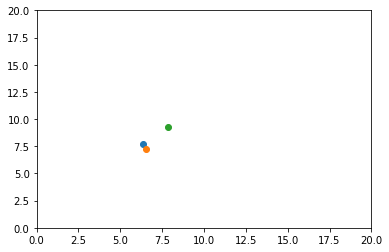

[[6.38968814 7.73307787]
 [6.57218763 7.26045099]
 [7.84812423 9.21647115]]


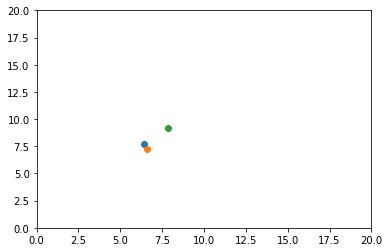

[[6.4060975  7.74318553]
 [6.583122   7.28473746]
 [7.8207805  9.18207701]]


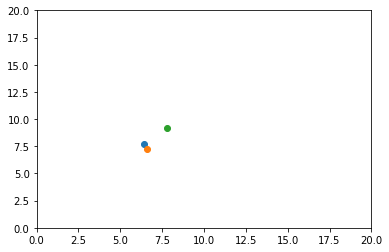

[[6.42201457 7.75298997]
 [6.59372834 7.30829533]
 [7.79425709 9.1487147 ]]


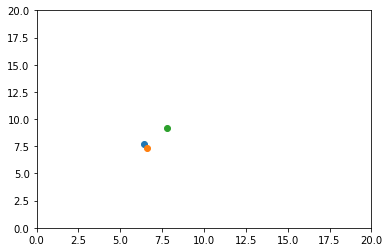

[[6.43745414 7.76250027]
 [6.60401649 7.33114647]
 [7.76852937 9.11635326]]


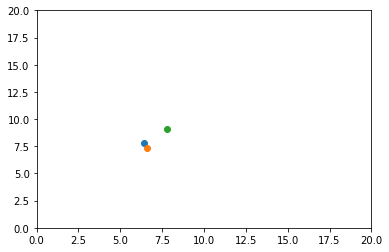

[[6.45243051 7.77172526]
 [6.613996   7.35331208]
 [7.74357349 9.08496266]]


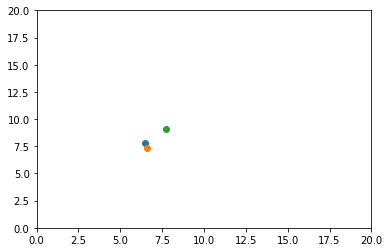

[[6.4669576  7.7806735 ]
 [6.62367612 7.37481272]
 [7.71936629 9.05451378]]


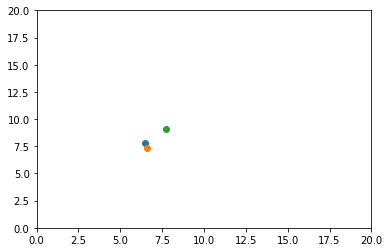

[[6.48104887 7.7893533 ]
 [6.63306583 7.39566833]
 [7.6958853  9.02497837]]


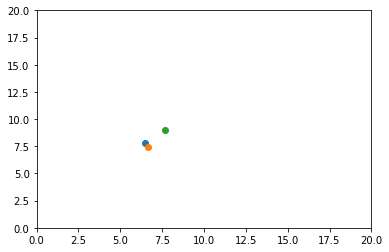

[[6.4947174  7.7977727 ]
 [6.64217386 7.41589828]
 [7.67310874 8.99632902]]


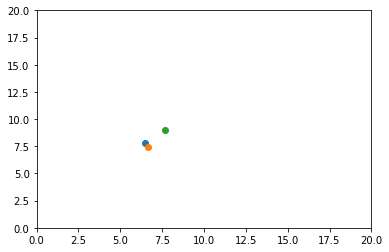

[[6.50797588 7.80593952]
 [6.65100864 7.43552134]
 [7.65101548 8.96853915]]


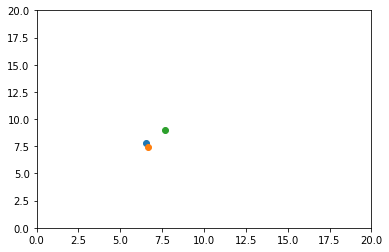

[[6.5208366  7.81386133]
 [6.65957838 7.4545557 ]
 [7.62958501 8.94158297]]


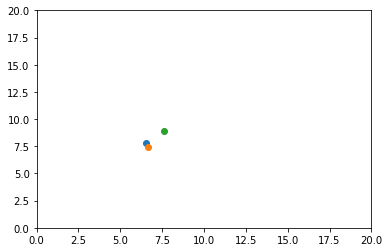

[[6.53331151 7.82154549]
 [6.66789103 7.47301903]
 [7.60879746 8.91543548]]


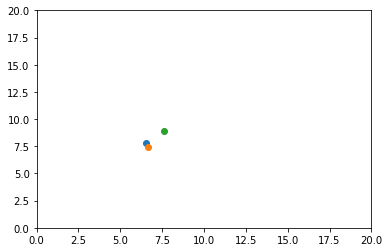

[[6.54541216 7.82899913]
 [6.6759543  7.49092845]
 [7.58863354 8.89007242]]


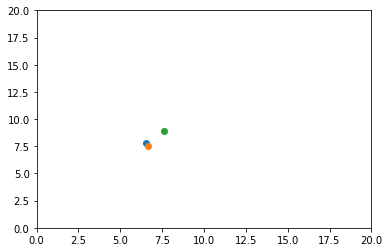

[[6.5571498  7.83622915]
 [6.68377567 7.5083006 ]
 [7.56907453 8.86547025]]


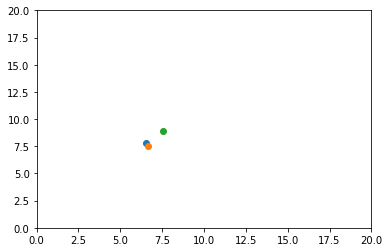

[[6.5685353  7.84324228]
 [6.6913624  7.52515158]
 [7.5501023  8.84160614]]


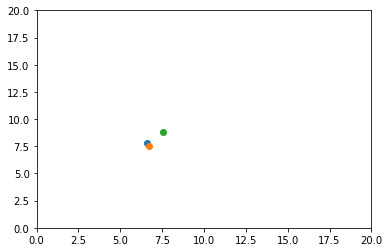

[[6.57957924 7.85004501]
 [6.69872153 7.54149704]
 [7.53169923 8.81845796]]


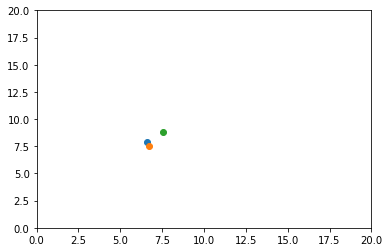

[[6.59029187 7.85664366]
 [6.70585988 7.55735212]
 [7.51384825 8.79600422]]


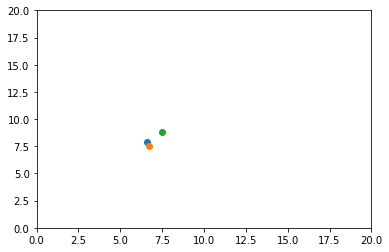

[[6.60068311 7.86304435]
 [6.71278409 7.57273156]
 [7.4965328  8.77422409]]


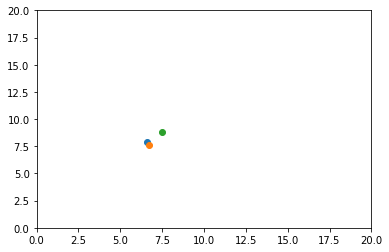

[[6.61076262 7.86925302]
 [6.71950056 7.58764961]
 [7.47973682 8.75309737]]


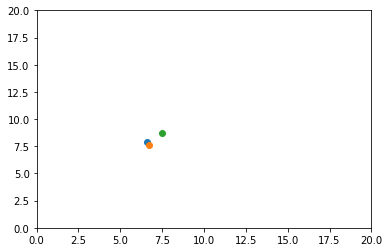

[[6.62053974 7.87527543]
 [6.72601555 7.60212013]
 [7.46344471 8.73260445]]


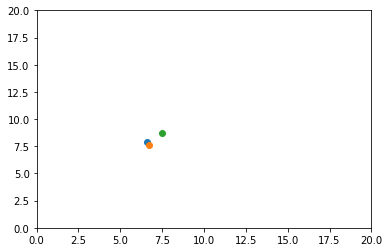

[[6.63002355 7.88111717]
 [6.73233508 7.61615652]
 [7.44764137 8.71272631]]


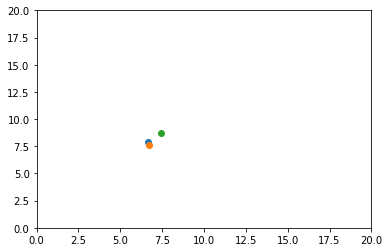

[[6.63922284 7.88678365]
 [6.73846503 7.62977183]
 [7.43231213 8.69344452]]


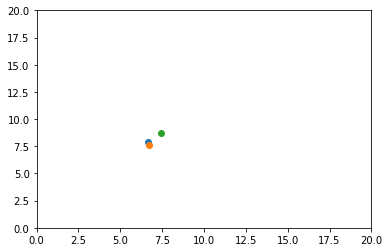

[[6.64814615 7.89228014]
 [6.74441108 7.64297867]
 [7.41744277 8.67474119]]


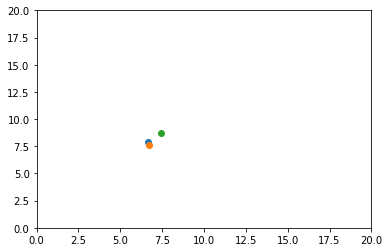

[[6.65680177 7.89761174]
 [6.75017875 7.65578931]
 [7.40301948 8.65659895]]


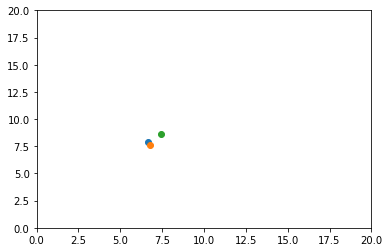

[[6.66519772 7.90278338]
 [6.75577338 7.66821563]
 [7.3890289  8.63900098]]


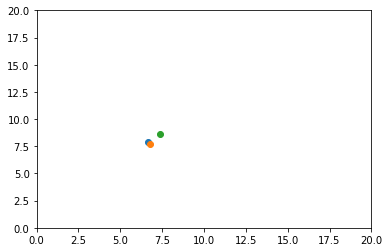

[[6.67334178 7.90779988]
 [6.76120018 7.68026916]
 [7.37545803 8.62193095]]


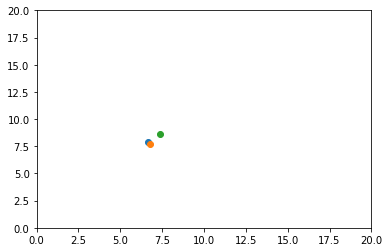

[[6.68124153 7.91266589]
 [6.76646418 7.69196109]
 [7.36229429 8.60537303]]


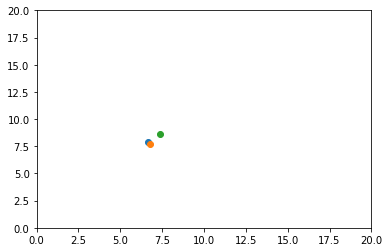

[[6.68890429 7.91738591]
 [6.77157025 7.70330226]
 [7.34952546 8.58931184]]


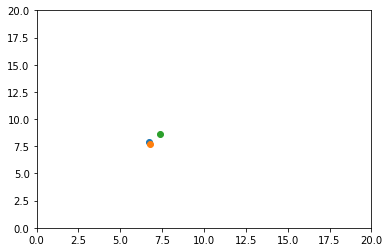

[[6.69633716 7.92196433]
 [6.77652314 7.71430319]
 [7.3371397  8.57373248]]


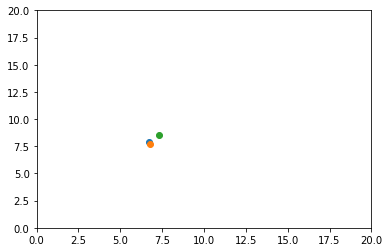

[[6.70354704 7.9264054 ]
 [6.78132745 7.72497409]
 [7.32512551 8.55862051]]


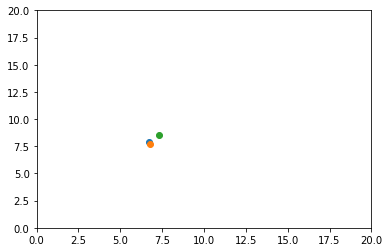

[[6.71054063 7.93071324]
 [6.78598763 7.73532487]
 [7.31347174 8.54396189]]


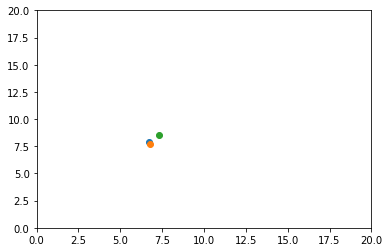

[[6.71732441 7.93489184]
 [6.790508   7.74536512]
 [7.30216759 8.52974303]]


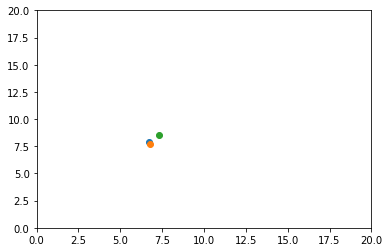

[[6.72390468 7.93894509]
 [6.79489276 7.75510417]
 [7.29120256 8.51595074]]


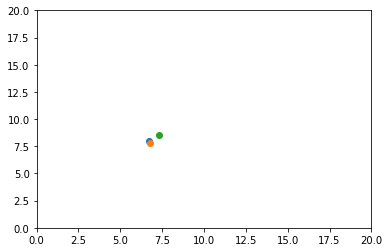

[[6.73028754 7.94287674]
 [6.79914597 7.76455104]
 [7.28056649 8.50257222]]


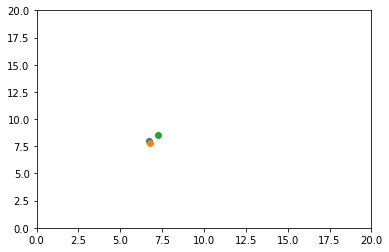

[[6.73647891 7.94669043]
 [6.8032716  7.77371451]
 [7.27024949 8.48959505]]


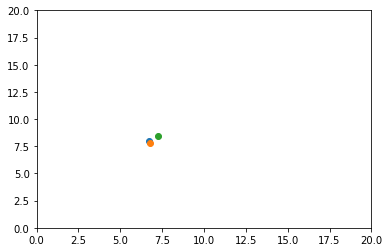

[[6.74248455 7.95038972]
 [6.80727345 7.78260308]
 [7.26024201 8.4770072 ]]


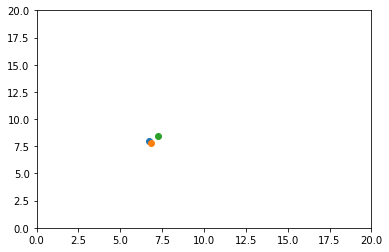

[[6.74831001 7.95397803]
 [6.81115524 7.79122499]
 [7.25053475 8.46479699]]


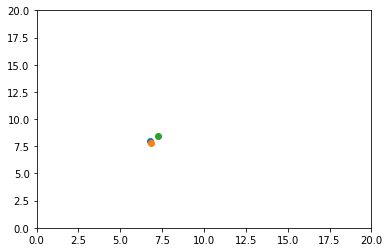

[[6.75396071 7.95745869]
 [6.81492059 7.79958824]
 [7.2411187  8.45295308]]


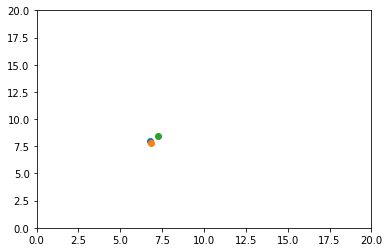

[[6.75944189 7.96083493]
 [6.81857297 7.80770059]
 [7.23198514 8.44146448]]


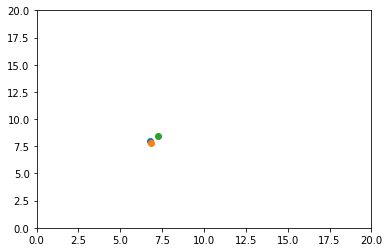

[[6.76475863 7.96410988]
 [6.82211578 7.81556957]
 [7.22312559 8.43032055]]


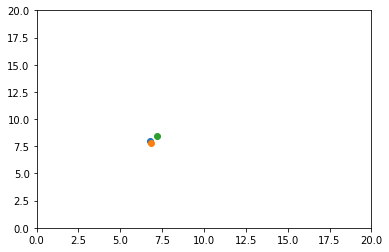

[[6.76991587 7.96728658]
 [6.82555231 7.82320248]
 [7.21453182 8.41951093]]


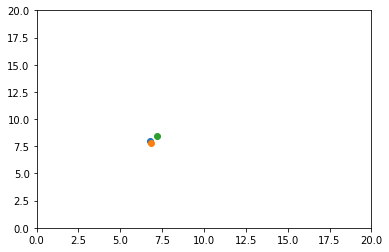

[[6.7749184  7.97036799]
 [6.82888574 7.83060641]
 [7.20619587 8.40902561]]


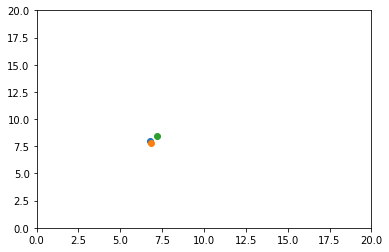

[[6.77977084 7.97335695]
 [6.83211917 7.83778822]
 [7.19810999 8.39885484]]


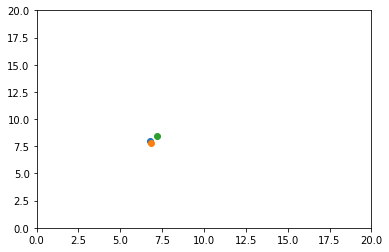

[[6.78447772 7.97625624]
 [6.83525559 7.84475457]
 [7.19026669 8.38898919]]


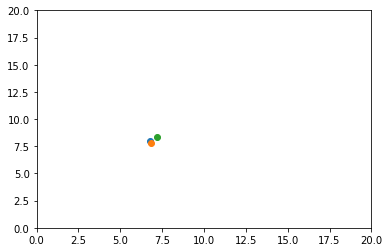

[[6.78904339 7.97906855]
 [6.83829792 7.85151193]
 [7.18265869 8.37941952]]


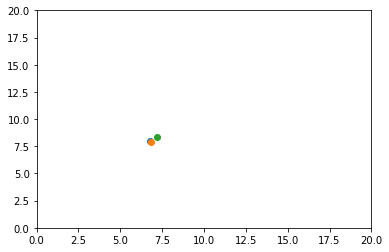

[[6.79347209 7.98179649]
 [6.84124898 7.85806658]
 [7.17527893 8.37013693]]


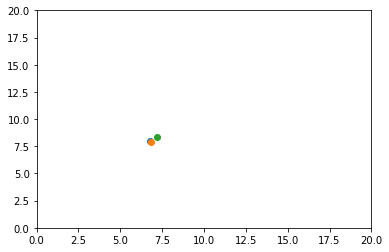

[[6.79776792 7.9844426 ]
 [6.84411152 7.86442458]
 [7.16812056 8.36113282]]


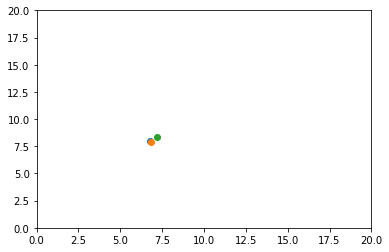

[[6.80193489 7.98700932]
 [6.84688817 7.87059184]
 [7.16117694 8.35239884]]


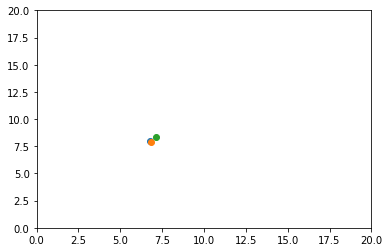

[[6.80597684 7.98949904]
 [6.84958152 7.87657409]
 [7.15444164 8.34392687]]


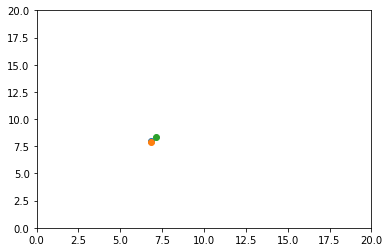

[[6.80989753 7.99191407]
 [6.85219408 7.88237686]
 [7.14790839 8.33570907]]


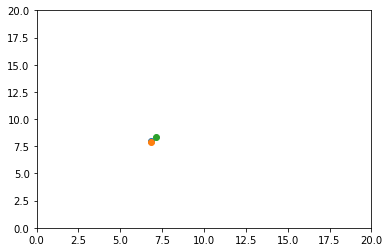

[[6.81370061 7.99425665]
 [6.85472826 7.88800556]
 [7.14157114 8.32773779]]


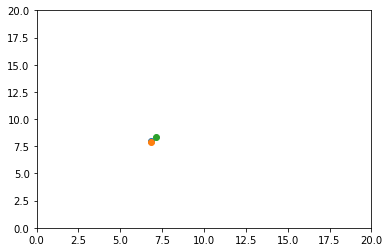

[[6.81738959 7.99652895]
 [6.85718641 7.89346539]
 [7.135424   8.32000566]]


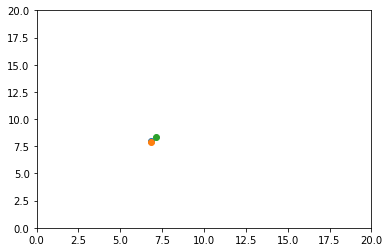

[[6.8209679  7.99873308]
 [6.85957082 7.89876143]
 [7.12946128 8.31250549]]


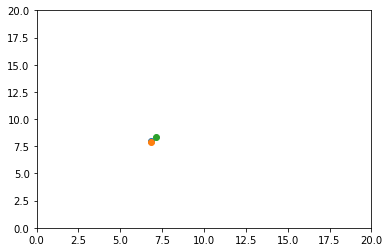

[[6.82443886 8.00087109]
 [6.86188369 7.90389859]
 [7.12367744 8.30523033]]


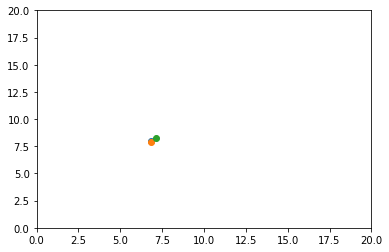

[[6.8278057  8.00294496]
 [6.86412718 7.90888163]
 [7.11806712 8.29817342]]


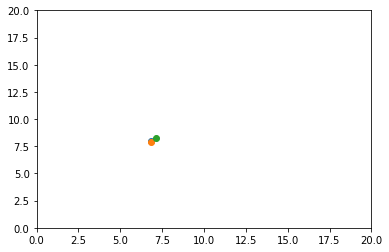

[[6.83107153 8.00495661]
 [6.86630337 7.91371518]
 [7.11262511 8.29132821]]


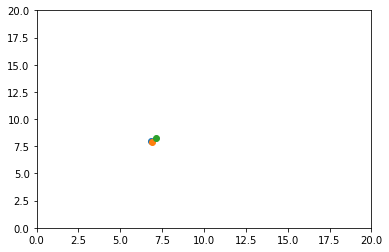

[[6.83423938 8.00690791]
 [6.86841426 7.91840372]
 [7.10734635 8.28468837]]


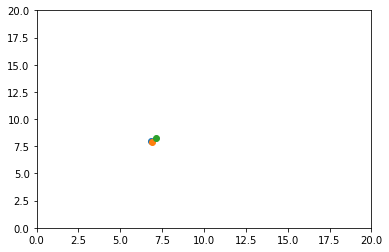

[[6.8373122  8.00880067]
 [6.87046184 7.92295161]
 [7.10222596 8.27824772]]


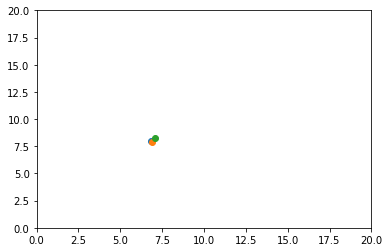

[[6.84029283 8.01063665]
 [6.87244798 7.92736306]
 [7.09725918 8.27200029]]


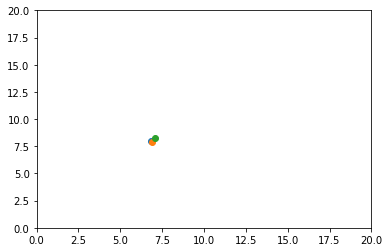

[[6.84318405 8.01241755]
 [6.87437454 7.93164217]
 [7.09244141 8.26594028]]


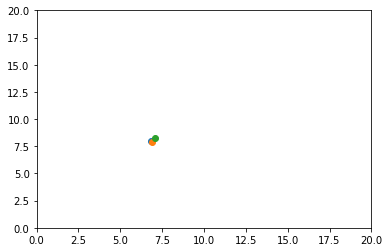

[[6.84598853 8.01414502]
 [6.87624331 7.93579291]
 [7.08776817 8.26006207]]


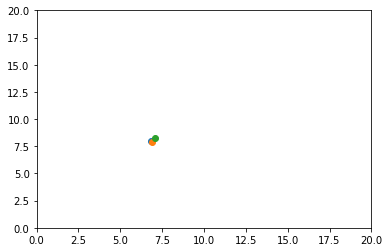

[[6.84870887 8.01582067]
 [6.87805601 7.93981912]
 [7.08323512 8.25436021]]


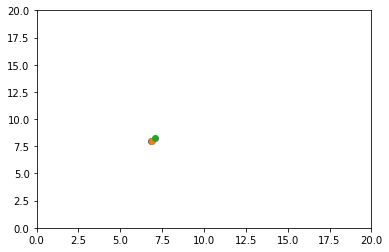

[[6.85134761 8.01744605]
 [6.87981433 7.94372455]
 [7.07883807 8.2488294 ]]


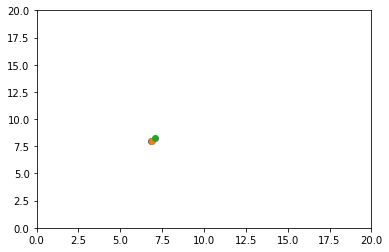

[[6.85390718 8.01902267]
 [6.8815199  7.94751281]
 [7.07457293 8.24346452]]


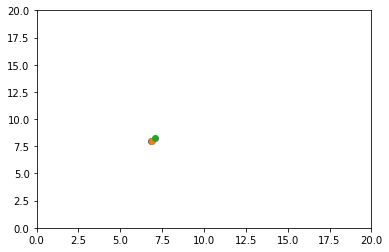

[[6.85638996 8.02055199]
 [6.8831743  7.95118743]
 [7.07043574 8.23826058]]


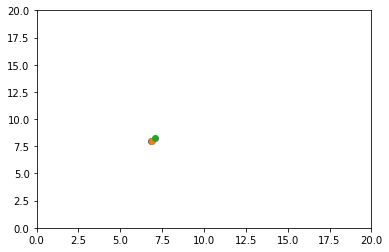

[[6.85879826 8.02203543]
 [6.88477907 7.9547518 ]
 [7.06642267 8.23321277]]


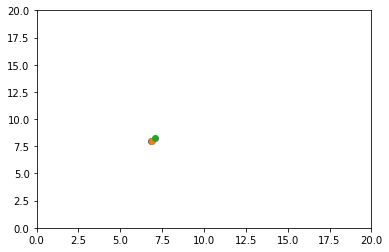

[[6.86113432 8.02347437]
 [6.8863357  7.95820925]
 [7.06252999 8.22831638]]


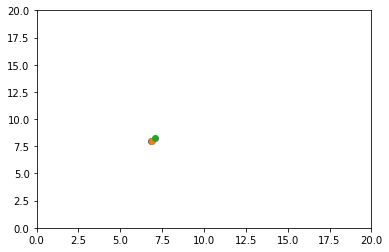

[[6.86340029 8.02487014]
 [6.88784563 7.96156297]
 [7.05875409 8.22356689]]


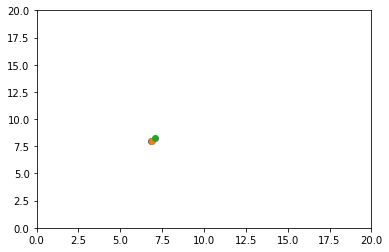

[[6.86559828 8.02622403]
 [6.88931026 7.96481608]
 [7.05509146 8.21895988]]


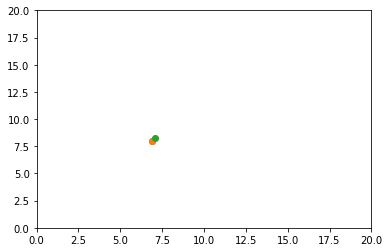

[[6.86773033 8.02753731]
 [6.89073095 7.9679716 ]
 [7.05153872 8.21449109]]


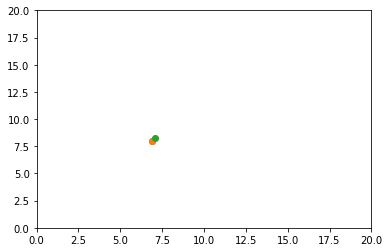

[[6.86979842 8.02881119]
 [6.89210902 7.97103245]
 [7.04809256 8.21015635]]


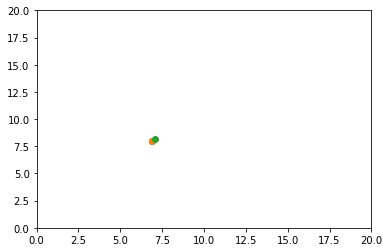

[[6.87180447 8.03004686]
 [6.89344575 7.97400148]
 [7.04474978 8.20595166]]


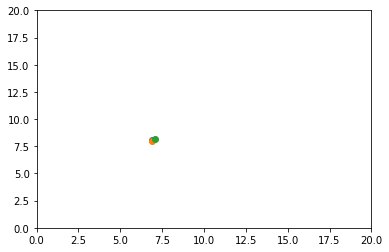

[[6.87375033 8.03124545]
 [6.89474238 7.97688143]
 [7.04150729 8.20187311]]


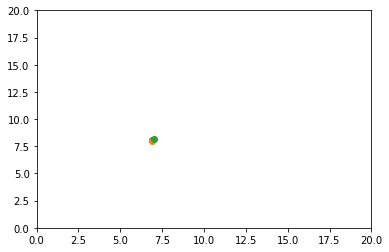

[[6.87563782 8.03240809]
 [6.89600011 7.97967499]
 [7.03836207 8.19791692]]


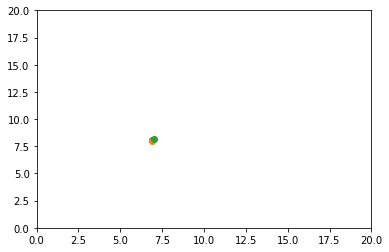

[[6.87746869 8.03353585]
 [6.8972201  7.98238474]
 [7.03531121 8.19407941]]


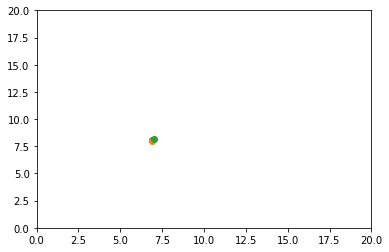

[[6.87924463 8.03462977]
 [6.8984035  7.9850132 ]
 [7.03235187 8.19035703]]


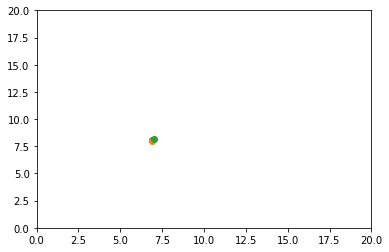

[[6.88096729 8.03569088]
 [6.8995514  7.9875628 ]
 [7.02948131 8.18674632]]


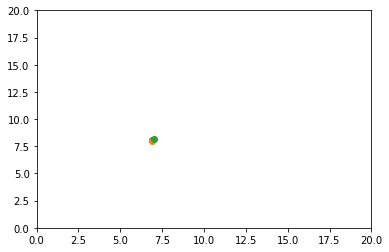

[[6.88263827 8.03672015]
 [6.90066485 7.99003592]
 [7.02669688 8.18324393]]


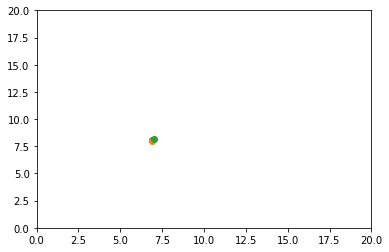

In [76]:
x_traj = []
x_traj.append(x)
err = rendezvous_error(x)
while err>0.5:
    # Calculate the point to move towards
    dx = np.kron(lapl, np.identity(p)) @ x.flatten()
    dx = dx.reshape((num_robots, 2))
    # Calculate direction to move towards
    theta = (np.arctan2(dx[:,1], dx[:,0]) + np.pi) % (2 * np.pi) - np.pi
    dist = np.hypot(dx[:,0], dx[:,1])
    x[:,0] = x[:,0] -  dist * np.cos(theta) * dt
    x[:,1] = x[:,1] -  dist * np.sin(theta) * dt
    
    err = rendezvous_error(x)
    print(x)
    plt.cla()
    for robot_pose in x:
        _ = plt.scatter(robot_pose[0], robot_pose[1])
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    plt.pause(0.1)
    plt.show()